## Problem Statement
- Development of a technique to predict missing environmental data for application in climate prediction (JABATAN METEOROLOGI MALAYSIA,  AMPANGAN MUDA Station)

### Outline
- The overall aim of the research is the development of a technique to predict missing environmental data for climate prediction. This can be used to improve the understanding of past, present, and future climate conditions and their potential impacts on the environment and society. By developing a more accurate and reliable technique for predicting missing environmental data, researchers can improve the accuracy and reliability of climate prediction models, which are critical tools for informing environmental management, policy, and decision-making.

- The ultimate goal of this research is to support efforts to mitigate and adapt to the impacts of climate change, such as climate change, sea level rise, and ecosystem disruption. By improving our ability to predict and understand these impacts, we can better prepare for them and develop effective strategies for managing and reducing their effects on the environment and society.



In [230]:
# import the necessary libraries
import numpy as np
import pandas as pd

# visuals libraries
import math
import glob


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None
import datetime as dt

In [231]:
# import and read file
df = pd.read_excel(r'C:\Users\user\Downloads\AmpaganMudaWSDel .xlsx')
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0            92       NaN   
1  2012      1    1     2  1014.5  24.3       23.0            93       NaN   
2  2012      1    1     3  1013.7  23.8       23.2            96       NaN   
3  2012      1    1     4  1012.9  23.6       23.1            97       NaN   
4  2012      1    1     5  1013.3  23.5       23.1            98       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN         0       0.0  
1         NaN         0       0.0  
2         NaN        57       1.8  
3         NaN        60       4.3  
4         NaN        60       9.8

In [232]:
# tail of the data
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20 -1.1  -1.1       -1.1            -1      -1.0   
24575  2014     12   31    21 -1.1  -1.1       -1.1            -1      -1.0   
24576  2014     12   31    22 -1.1  -1.1       -1.1            -1      -1.0   
24577  2014     12   31    23 -1.1  -1.1       -1.1            -1      -1.0   
24578  2014     12   31    24 -1.1  -1.1       -1.1            -1      -1.0   

       wind_speed  rain_dur  rain_amt  
24574        -1.1        -1      -1.1  
24575        -1.1        -1      -1.1  
24576        -1.1        -1      -1.1  
24577        -1.1        -1      -1.1  
24578        -1.1        -1      -1.1

## Features of the Dataset
Year

Month 

Day

Mean Surface Time ( MST )- Hour

Atmospheric Pressure ( Hpa )

Temperature ( ° C )

Dew point ( ° C )

Relative Humidity ( % )

Wind Direction ( ° )

Wind speed ( m/s )

Rainfall Duration( min )

Rainfall Amount ( mm )

## Data Inspection and Manipulation


In [174]:
# shape of the data
df.shape

(24579, 12)

In [175]:
# data columns
df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [176]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24579 non-null  int64  
 1   Month         24579 non-null  int64  
 2   Day           24579 non-null  int64  
 3   MST           24579 non-null  int64  
 4   Hpa           24579 non-null  float64
 5   Temp          24579 non-null  float64
 6   Dew_point     24579 non-null  float64
 7   rel_humidity  24579 non-null  int64  
 8   wind_dir      16503 non-null  float64
 9   wind_speed    16503 non-null  float64
 10  rain_dur      24579 non-null  int64  
 11  rain_amt      24579 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.3 MB


In [177]:
# check for missing values
df.isnull().sum()

Year               0
Month              0
Day                0
MST                0
Hpa                0
Temp               0
Dew_point          0
rel_humidity       0
wind_dir        8076
wind_speed      8076
rain_dur           0
rain_amt           0
dtype: int64

In [178]:
# percentage of missing values
null_pct = df.apply(pd.isnull).sum()/df.shape[0] 
null_pct

Year            0.000000
Month           0.000000
Day             0.000000
MST             0.000000
Hpa             0.000000
Temp            0.000000
Dew_point       0.000000
rel_humidity    0.000000
wind_dir        0.328573
wind_speed      0.328573
rain_dur        0.000000
rain_amt        0.000000
dtype: float64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

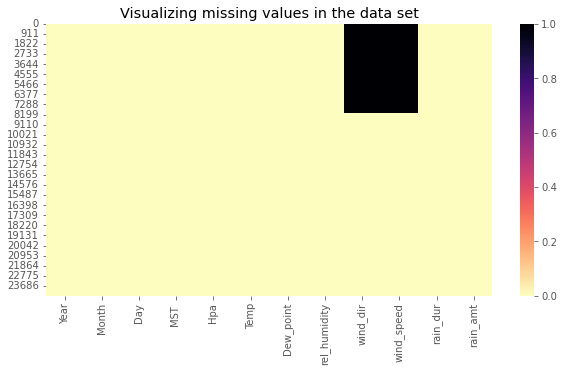

In [179]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(df.isnull(),  cbar = True, cmap = 'magma_r')

In [180]:
# descriptive statistics for all the features
df.describe()

Year         Month          Day          MST            Hpa  \
count  24579.000000  24579.000000  24579.00000  24579.000000  24579.000000   
mean    2012.986615      6.387933     15.78266     12.492494    887.217922   
std        0.802252      3.497451      8.88359      6.921909    334.178733   
min     2012.000000      1.000000      1.00000      1.000000     -1.100000   
25%     2012.000000      3.000000      8.00000      6.000000   1010.600000   
50%     2013.000000      6.000000     16.00000     12.000000   1012.600000   
75%     2014.000000      9.000000     23.00000     18.000000   1014.200000   
max     2014.000000     12.000000     31.00000     24.000000   1020.000000   

               Temp     Dew_point  rel_humidity      wind_dir    wind_speed  \
count  24579.000000  24579.000000  24579.000000  16503.000000  16503.000000   
mean      23.094719     19.896538     72.112820    122.788039      0.501515   
std        9.670987      8.040835     31.406057    119.758202      0.883804   
min       -1.100000     -1.100000     -1.000000     -1.000000     -1.100000   
25%       23.300000     21.500000     61.000000     10.000000      0.300000   
50%       24.800000     22.900000     85.000000     70.000000      0.500000   
75%       28.600000     23.800000     96.000000    240.000000      1.000000   
max       37.000000     27.600000    100.000000    360.000000     13.200000   

           rain_dur      rain_amt  
count  24579.000000  24579.000000  
mean       1.841206      0.131763  
std        8.575241      1.970461  
min       -1.000000     -1.100000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       60.000000     55.100000

## How to visualize pattern of missing values?
You can visualize missing values in the data using missingno package. It gives a very clear picture.

Visualize the presence of missing data. The matrix method will make a black bar for each column with the missing data points marked at various locations.

In [233]:
 # to visualize missing value
import missingno as msno

<AxesSubplot:>

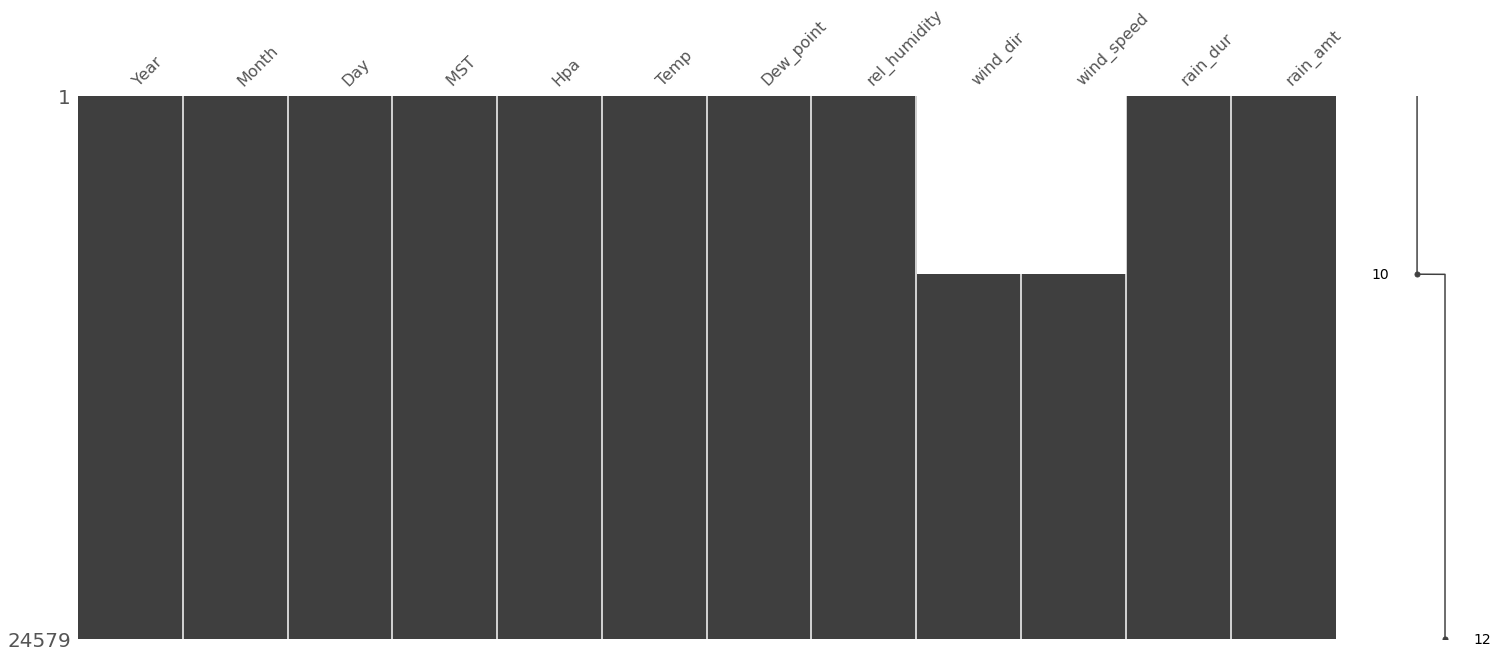

In [234]:
# visualize missing data
msno.matrix(df)

## Do the missingness of values in one column affect the missing data behaviour in another?
Check the Correlation of missing values amongst columns

A high correlation would mean the missingness of values in one column is related to the missingness of values in another column. This can sometimes help gain more insights as to why two are more columns may be missing together and formulate a suitable tactic to handle it.

<AxesSubplot:>

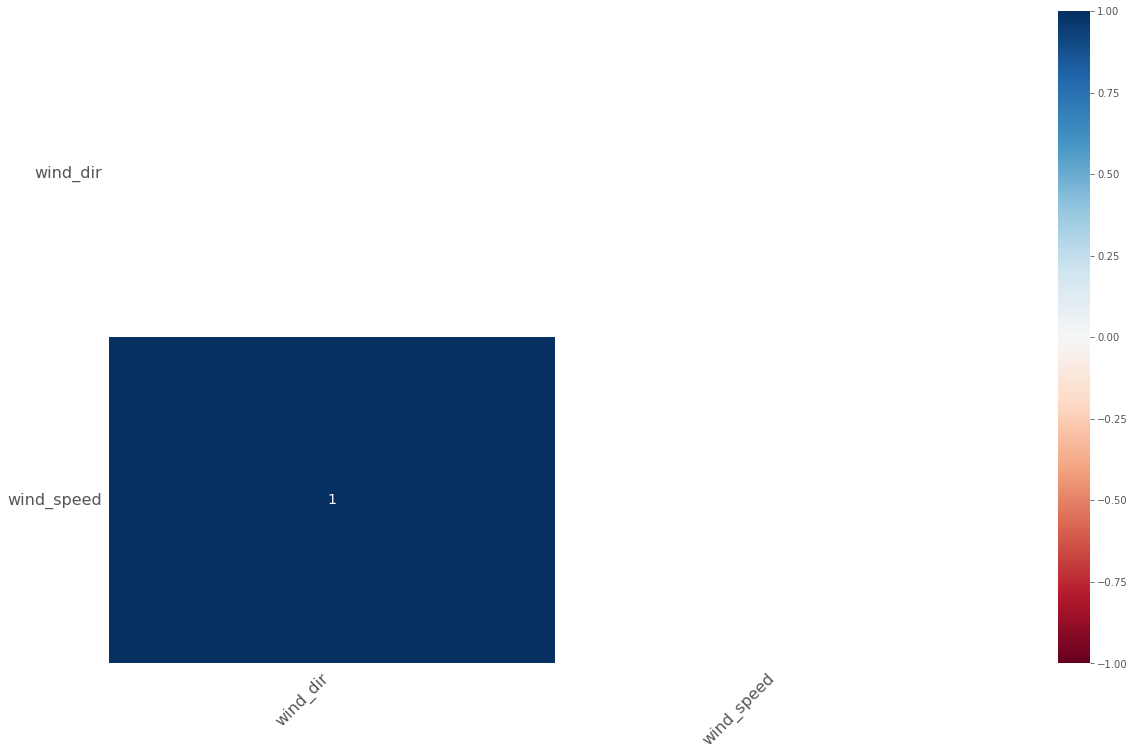

In [235]:
msno.heatmap(df)

In [236]:
# Exhaustive Summary of dataframe 
from datatile.summary.df import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats

Year    Month      Day     MST       Hpa     Temp Dew_point  \
counts          24579    24579    24579    24579    24579    24579     24579   
uniques             3       12       31       24      143      200       142   
missing             0        0        0        0        0        0         0   
missing_perc       0%       0%       0%       0%       0%       0%        0%   
types         numeric  numeric  numeric  numeric  numeric  numeric   numeric   

             rel_humidity wind_dir wind_speed rain_dur rain_amt  
counts              24579    16503      16503    24579    24579  
uniques                77       38         38       62      207  
missing                 0     8076       8076        0        0  
missing_perc           0%   32.86%     32.86%       0%       0%  
types             numeric  numeric    numeric  numeric  numeric

## Steps to filling Missing values
We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0.

Specifically, the following columns have an invalid zero minimum and negative value:

1: Hpa

2: Dew Point

3: Relative Humidity

4: Wind Direction

5: Wind Speed

6: Rain Duration

7: Temperature

8: Rain Amount

In [237]:
# Replace all occurrences of negative values with NaN
df.replace(to_replace= [-1, -1.1], value = np.nan, inplace=True)
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0          92.0       NaN   
1  2012      1    1     2  1014.5  24.3       23.0          93.0       NaN   
2  2012      1    1     3  1013.7  23.8       23.2          96.0       NaN   
3  2012      1    1     4  1012.9  23.6       23.1          97.0       NaN   
4  2012      1    1     5  1013.3  23.5       23.1          98.0       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN       0.0       0.0  
1         NaN       0.0       0.0  
2         NaN      57.0       1.8  
3         NaN      60.0       4.3  
4         NaN      60.0       9.8

In [238]:
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20  NaN   NaN        NaN           NaN       NaN   
24575  2014     12   31    21  NaN   NaN        NaN           NaN       NaN   
24576  2014     12   31    22  NaN   NaN        NaN           NaN       NaN   
24577  2014     12   31    23  NaN   NaN        NaN           NaN       NaN   
24578  2014     12   31    24  NaN   NaN        NaN           NaN       NaN   

       wind_speed  rain_dur  rain_amt  
24574         NaN       NaN       NaN  
24575         NaN       NaN       NaN  
24576         NaN       NaN       NaN  
24577         NaN       NaN       NaN  
24578         NaN       NaN       NaN

In [239]:
df.isna().sum()

Year                0
Month               0
Day                 0
MST                 0
Hpa              3047
Temp             3047
Dew_point        3047
rel_humidity     3047
wind_dir        10725
wind_speed      10725
rain_dur         2707
rain_amt         2707
dtype: int64

In [240]:
# checking if there are -ve values
df[df < 0].count()

Year            0
Month           0
Day             0
MST             0
Hpa             0
Temp            0
Dew_point       0
rel_humidity    0
wind_dir        0
wind_speed      0
rain_dur        0
rain_amt        0
dtype: int64

In [241]:
# check the features with 0 value
df[df == 0]

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0       NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
1       NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
2       NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
3       NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
4       NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
...     ...    ...  ...   ...  ...   ...        ...           ...       ...   
24574   NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
24575   NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
24576   NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
24577   NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   
24578   NaN    NaN  NaN   NaN  NaN   NaN        NaN           NaN       NaN   

       wind_speed  rain_dur  rain_amt  
0             NaN       0.0       0.0  
1             NaN       0.0       0.0  
2             NaN       NaN       NaN  
3             NaN       NaN       NaN  
4             NaN       NaN       NaN  
...           ...       ...       ...  
24574         NaN       NaN       NaN  
24575         NaN       NaN       NaN  
24576         NaN       NaN       NaN  
24577         NaN       NaN       NaN  
24578         NaN       NaN       NaN  

[24579 rows x 12 columns]

In [242]:
df[df == 0].count()

Year                0
Month               0
Day                 0
MST                 0
Hpa                 0
Temp                0
Dew_point           0
rel_humidity        0
wind_dir         1362
wind_speed       1362
rain_dur        20154
rain_amt        20154
dtype: int64

In [243]:
# replacing the features with 0 as NaN
df.replace(0, np.nan, inplace = True)
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0          92.0       NaN   
1  2012      1    1     2  1014.5  24.3       23.0          93.0       NaN   
2  2012      1    1     3  1013.7  23.8       23.2          96.0       NaN   
3  2012      1    1     4  1012.9  23.6       23.1          97.0       NaN   
4  2012      1    1     5  1013.3  23.5       23.1          98.0       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN       NaN       NaN  
1         NaN       NaN       NaN  
2         NaN      57.0       1.8  
3         NaN      60.0       4.3  
4         NaN      60.0       9.8

In [244]:
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20  NaN   NaN        NaN           NaN       NaN   
24575  2014     12   31    21  NaN   NaN        NaN           NaN       NaN   
24576  2014     12   31    22  NaN   NaN        NaN           NaN       NaN   
24577  2014     12   31    23  NaN   NaN        NaN           NaN       NaN   
24578  2014     12   31    24  NaN   NaN        NaN           NaN       NaN   

       wind_speed  rain_dur  rain_amt  
24574         NaN       NaN       NaN  
24575         NaN       NaN       NaN  
24576         NaN       NaN       NaN  
24577         NaN       NaN       NaN  
24578         NaN       NaN       NaN

In [245]:
# checking the missing values
df.isna().sum()

Year                0
Month               0
Day                 0
MST                 0
Hpa              3047
Temp             3047
Dew_point        3047
rel_humidity     3047
wind_dir        12087
wind_speed      12087
rain_dur        22861
rain_amt        22861
dtype: int64

<AxesSubplot:>

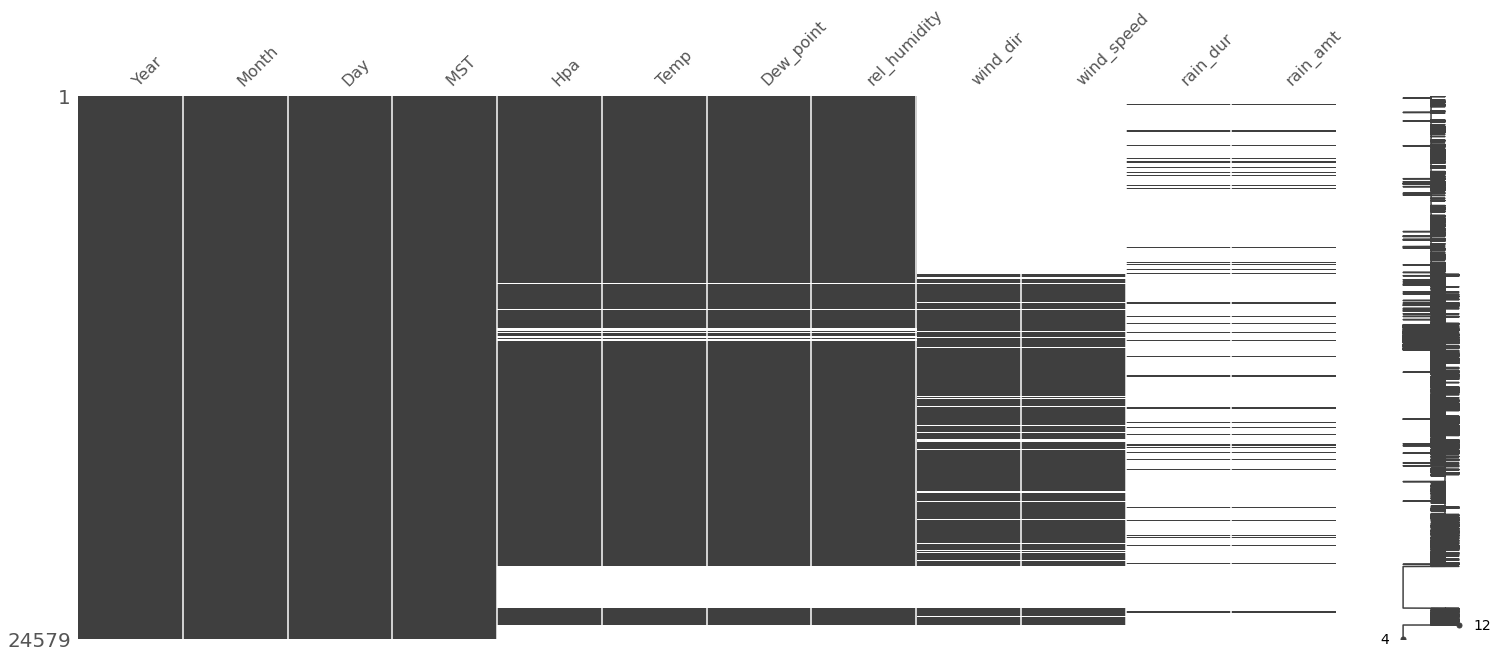

In [247]:
# visualize missing data
msno.matrix(df)

<AxesSubplot:>

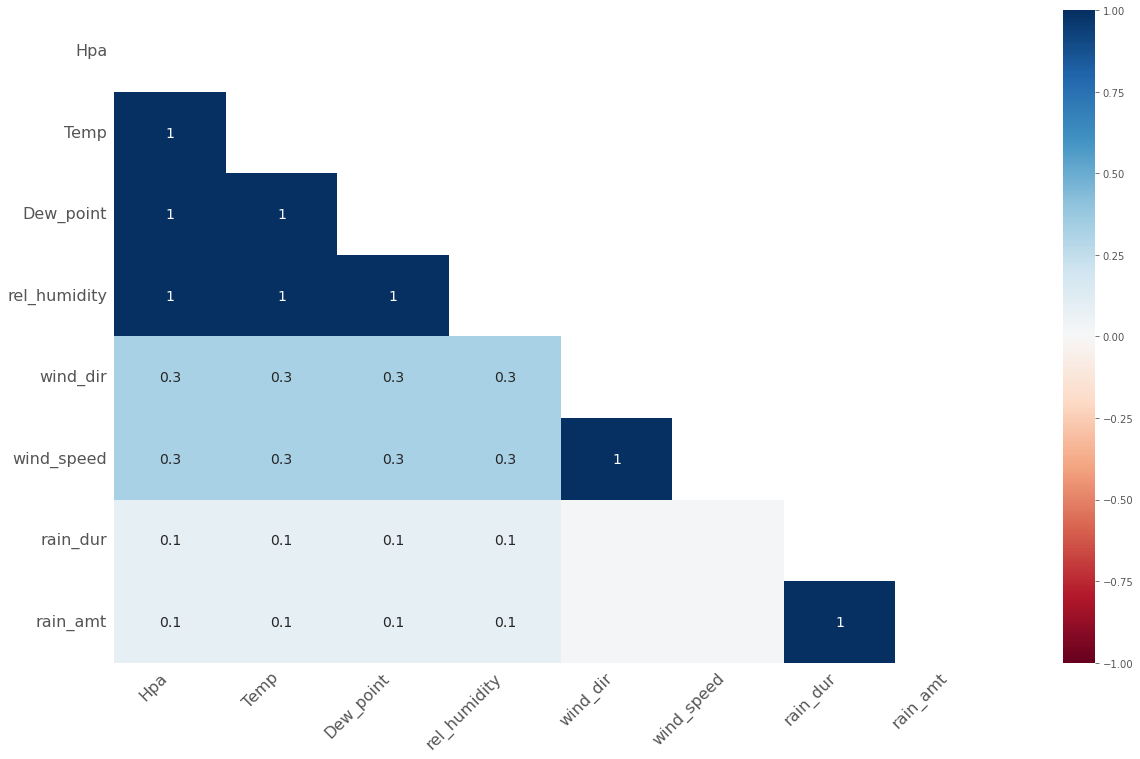

In [248]:
# heatmap of the missing data
msno.heatmap(df)

In [249]:
# percentage of missing values
null_pct1 = df.apply(pd.isnull).sum()/df.shape[0] 
null_pct1

Year            0.000000
Month           0.000000
Day             0.000000
MST             0.000000
Hpa             0.123968
Temp            0.123968
Dew_point       0.123968
rel_humidity    0.123968
wind_dir        0.491761
wind_speed      0.491761
rain_dur        0.930103
rain_amt        0.930103
dtype: float64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

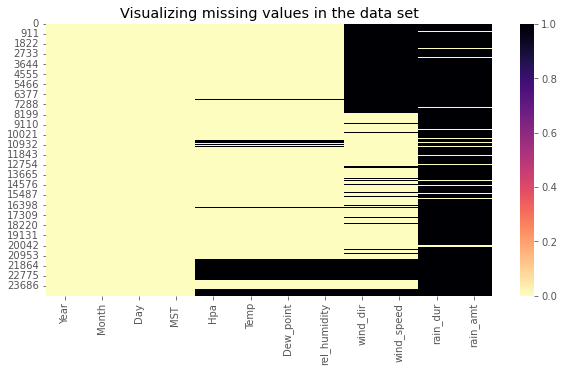

In [250]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(df.isnull(),  cbar = True, cmap = 'magma_r')

In [24]:
df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [25]:
# statiscal description of without missing dataframe
df.describe()

Year         Month          Day          MST            Hpa  \
count  24579.000000  24579.000000  24579.00000  24579.000000  21532.000000   
mean    2012.986615      6.387933     15.78266     12.492494   1012.924067   
std        0.802252      3.497451      8.88359      6.921909      2.099394   
min     2012.000000      1.000000      1.00000      1.000000   1005.200000   
25%     2012.000000      3.000000      8.00000      6.000000   1011.500000   
50%     2013.000000      6.000000     16.00000     12.000000   1013.000000   
75%     2014.000000      9.000000     23.00000     18.000000   1014.400000   
max     2014.000000     12.000000     31.00000     24.000000   1020.000000   

               Temp     Dew_point  rel_humidity      wind_dir    wind_speed  \
count  21532.000000  21532.000000  21532.000000  12492.000000  12492.000000   
mean      26.518521     22.867764     82.459038    162.425552      0.895805   
std        3.492710      1.608676     16.198726    111.725108      0.552354   
min       15.300000     12.000000     25.000000     10.000000      0.300000   
25%       23.800000     22.200000     70.000000     50.000000      0.500000   
50%       25.300000     23.100000     90.000000    170.000000      0.700000   
75%       29.300000     23.900000     96.000000    250.000000      1.200000   
max       37.000000     27.600000    100.000000    360.000000     13.200000   

          rain_dur     rain_amt  
count  1718.000000  1718.000000  
mean     27.917346     3.618335  
std      17.881091     6.389056  
min       1.000000     0.100000  
25%      12.000000     0.400000  
50%      23.500000     1.200000  
75%      42.000000     3.800000  
max      60.000000    55.100000

## Dealing with Missing values in all the features of the Dataset

In [27]:
from sklearn.impute import KNNImputer

In [28]:
## Using KNN Imputer to imput missing values
impute_knn = KNNImputer(n_neighbors = 5)
imputed_df_knn = impute_knn.fit_transform(df)

In [29]:
# Convert the imputed data array back into a DataFrame
imputed_df = pd.DataFrame(imputed_df_knn, columns = df.columns) 

In [30]:
# check the head
imputed_df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012.0    1.0  1.0   1.0  1014.9  24.4       23.0          92.0     192.0   
1  2012.0    1.0  1.0   2.0  1014.5  24.3       23.0          93.0     168.0   
2  2012.0    1.0  1.0   3.0  1013.7  23.8       23.2          96.0     182.0   
3  2012.0    1.0  1.0   4.0  1012.9  23.6       23.1          97.0     138.0   
4  2012.0    1.0  1.0   5.0  1013.3  23.5       23.1          98.0     216.0   

   wind_speed  rain_dur  rain_amt  
0        0.54      39.6      2.32  
1        0.46      39.6      2.32  
2        0.42      57.0      1.80  
3        0.38      60.0      4.30  
4        0.42      60.0      9.80

In [31]:
# check the tail
imputed_df.tail()

Year  Month   Day  MST       Hpa   Temp  Dew_point  rel_humidity  \
24574  2014.0   12.0  31.0  20.0  1014.02  26.42      22.48          79.4   
24575  2014.0   12.0  31.0  21.0  1014.88  25.32      22.50          84.8   
24576  2014.0   12.0  31.0  22.0  1015.58  24.60      22.42          88.0   
24577  2014.0   12.0  31.0  23.0  1015.94  23.84      22.32          91.6   
24578  2014.0   12.0  31.0  24.0  1015.34  23.84      22.70          93.6   

       wind_dir  wind_speed  rain_dur  rain_amt  
24574     166.0        0.78      45.0      5.58  
24575     136.0        0.62      47.2      6.52  
24576     242.0        0.52      38.0      3.64  
24577     206.0        0.50      38.0      3.64  
24578     210.0        0.44      38.0      3.64

In [32]:
# checking if there is missing values
imputed_df.isnull().sum()

Year            0
Month           0
Day             0
MST             0
Hpa             0
Temp            0
Dew_point       0
rel_humidity    0
wind_dir        0
wind_speed      0
rain_dur        0
rain_amt        0
dtype: int64

There are no missing NULL values in the dataset, we are now ready for Exploratory Data Analysis

## Exploratory Data Analysis And Visualization of without Missing values Dataframe
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- checking a feature of the dataset and its visuals

In [33]:
# Descriptive statistical analysis of atmospheric presure(Hpa) 
imputed_df['Hpa'].describe()

count    24579.000000
mean      1012.902575
std          2.040349
min       1005.200000
25%       1011.500000
50%       1012.980000
75%       1014.300000
max       1020.000000
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Hpa'>

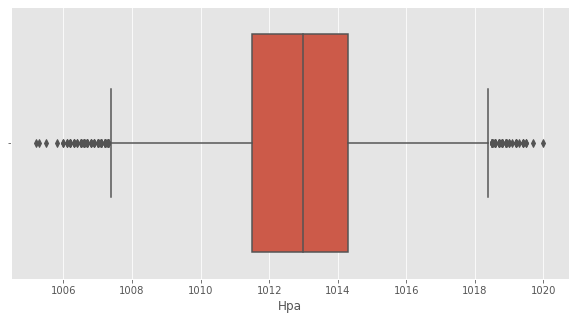

In [34]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = imputed_df, x = 'Hpa')

<AxesSubplot:xlabel='Hpa', ylabel='Count'>

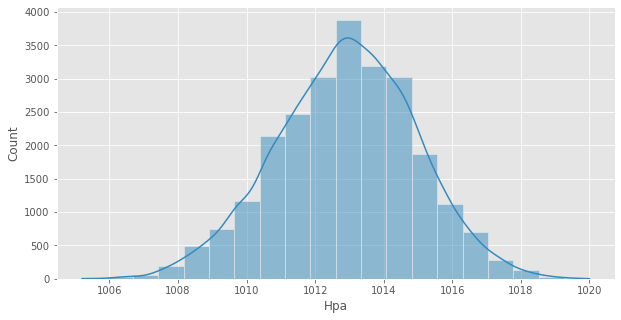

In [35]:
# creating an histogram plot
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = imputed_df, x= 'Hpa', bins=20, kde=True)

In [36]:
# Descriptive statistical analysis for temperature(Temp) 
imputed_df['Temp'].describe()

count    24579.000000
mean        26.496137
std          3.420946
min         15.300000
25%         23.800000
50%         25.300000
75%         29.200000
max         37.000000
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Temp'>

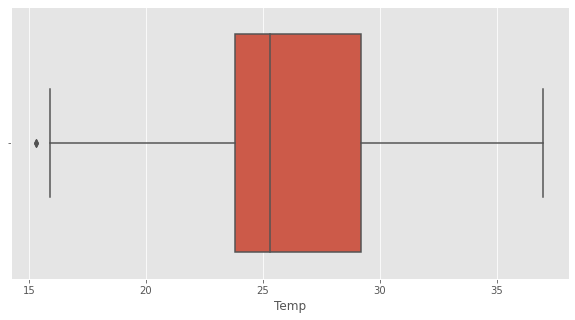

In [37]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = imputed_df, x = 'Temp')

<AxesSubplot:xlabel='Temp', ylabel='Count'>

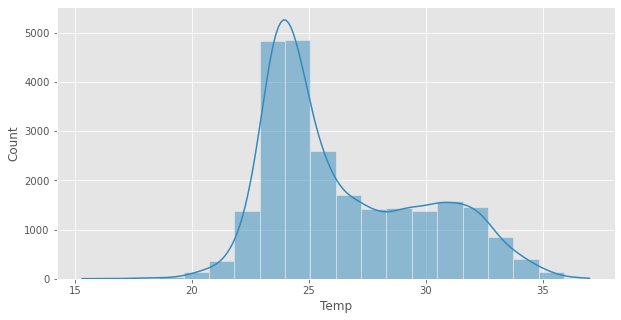

In [38]:
# creating an histogram plot
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = imputed_df, x= 'Temp', bins=20, kde=True)

In [39]:
# Descriptive statistical analysis for relative humidity(rel_humidity) 
imputed_df['rel_humidity'].describe()

count    24579.000000
mean        82.843598
std         15.864097
min         25.000000
25%         70.000000
50%         90.000000
75%         96.000000
max        100.000000
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='rel_humidity'>

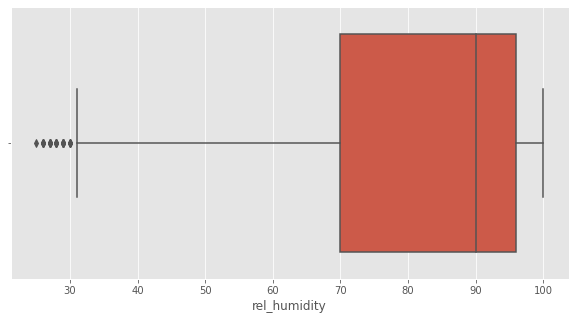

In [40]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = imputed_df, x = 'rel_humidity')

<AxesSubplot:xlabel='rel_humidity', ylabel='Count'>

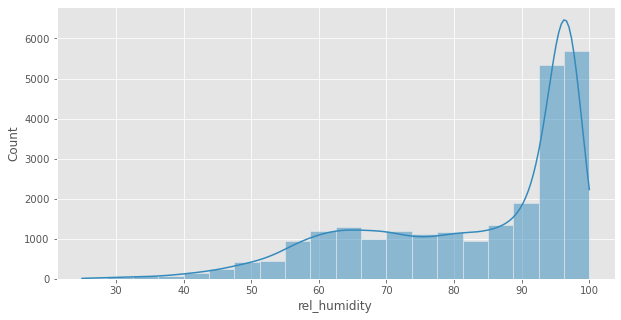

In [41]:
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = imputed_df, x= 'rel_humidity', bins = 20, kde=True)

In [42]:
# Descriptive statistical analysis for wind speed(wind_speed) 
imputed_df['wind_speed'].describe()

count    24579.000000
mean         0.832642
std          0.480177
min          0.300000
25%          0.460000
50%          0.700000
75%          1.100000
max         13.200000
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='wind_speed'>

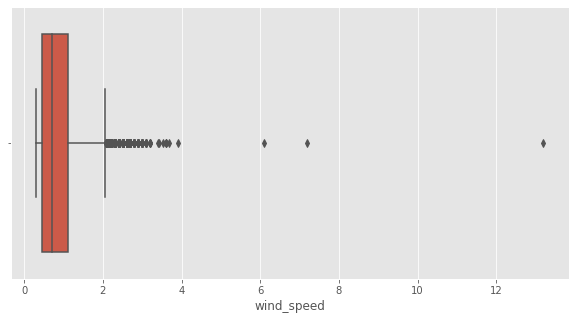

In [43]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = imputed_df, x = 'wind_speed')

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

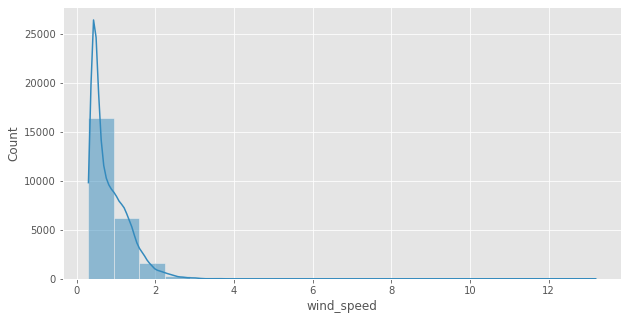

In [44]:
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = imputed_df, x= 'wind_speed', bins = 20, kde=True)

### Bivariate Analysis
- comparing two features or variables and their visuals.

In [45]:
# Average Hpa by year
hpa_yr = imputed_df['Hpa'].groupby(imputed_df.Year).mean()
hpa_yr

Year
2012.0    1012.717504
2013.0    1012.866757
2014.0    1013.135988
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Hpa'>

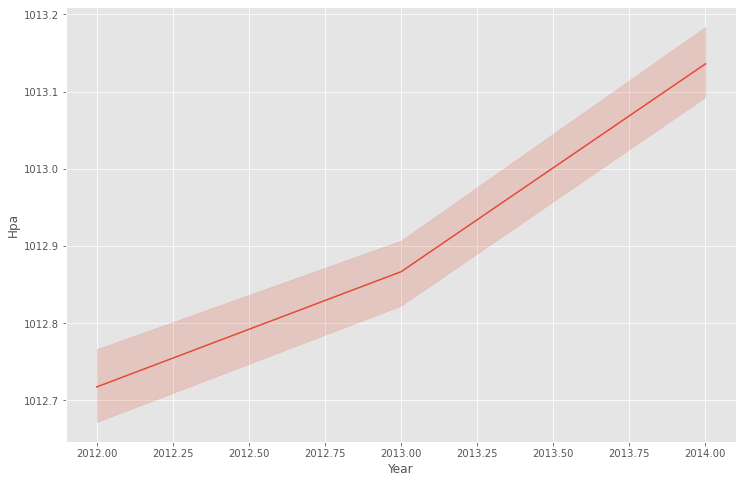

In [46]:
# visualizing Hpa by Year
sns.lineplot(data = imputed_df, x = "Year", y = "Hpa")

In [47]:
# average Hpa by Month
imputed_df['Hpa'].groupby(imputed_df.Month).mean()

Month
1.0     1014.325925
2.0     1012.935184
3.0     1013.233504
4.0     1012.714315
5.0     1012.203746
6.0     1011.312034
7.0     1012.082079
8.0     1012.860534
9.0     1013.422686
10.0    1013.720243
11.0    1012.824401
12.0    1013.070818
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Hpa'>

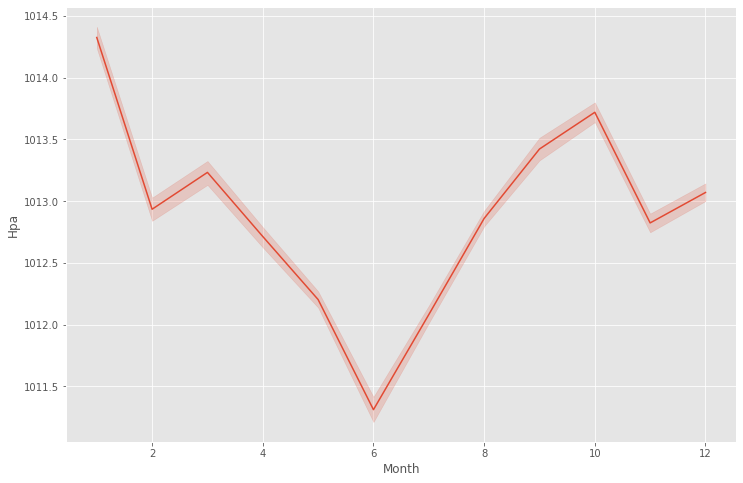

In [48]:
# Visualizing average Hpa by Month
sns.lineplot(data= imputed_df, x="Month", y="Hpa")

In [49]:
imputed_df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [50]:
# average Hpa by Day
imputed_df['Hpa'].groupby(imputed_df.Day).mean()

Day
1.0     1012.874070
2.0     1012.911704
3.0     1012.839019
4.0     1012.832458
5.0     1012.892971
6.0     1012.943985
7.0     1012.799794
8.0     1012.832741
9.0     1012.709519
10.0    1012.816405
11.0    1012.792252
12.0    1012.751944
13.0    1012.753283
14.0    1012.711139
15.0    1012.749735
16.0    1012.793750
17.0    1012.813714
18.0    1012.932725
19.0    1012.967509
20.0    1013.110920
21.0    1012.934706
22.0    1012.815147
23.0    1012.855956
24.0    1013.006379
25.0    1012.986201
26.0    1013.035166
27.0    1013.229000
28.0    1013.226587
29.0    1013.091590
30.0    1012.904922
31.0    1013.107354
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Hpa'>

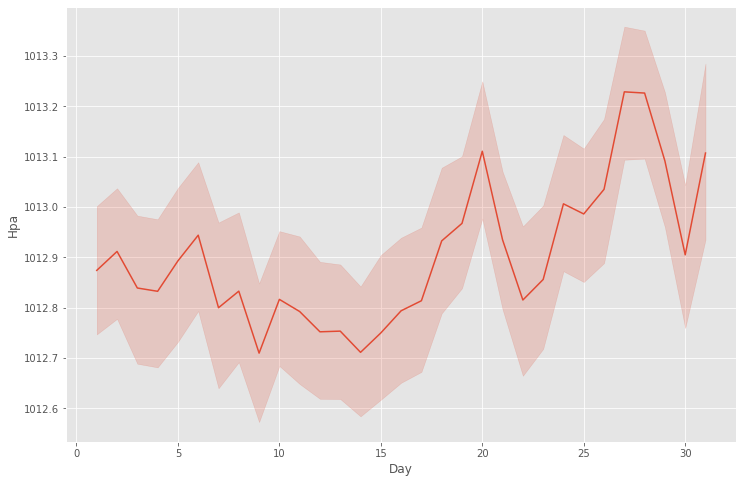

In [51]:
# Visualizing average Hpa by Day
sns.lineplot(data= imputed_df, x="Day", y="Hpa")

In [52]:
# average Hpa by MST
imputed_df['Hpa'].groupby(imputed_df['MST ']).mean()

MST 
1.0     1014.117719
2.0     1013.534800
3.0     1012.948020
4.0     1012.547305
5.0     1012.457580
6.0     1012.668410
7.0     1013.085815
8.0     1013.725912
9.0     1014.356059
10.0    1014.632812
11.0    1014.467734
12.0    1013.902476
13.0    1013.046699
14.0    1012.038127
15.0    1011.078751
16.0    1010.496794
17.0    1010.377537
18.0    1010.716031
19.0    1011.403092
20.0    1012.233763
21.0    1013.129384
22.0    1013.916301
23.0    1014.350605
24.0    1014.420842
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='MST ', ylabel='Hpa'>

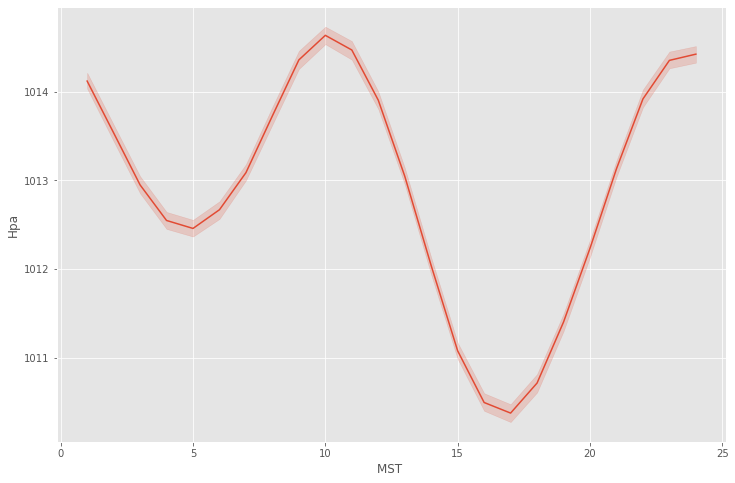

In [53]:
# Visualizing average Hpa by Hour
sns.lineplot(data= imputed_df, x= 'MST ', y="Hpa")

In [54]:
# Pivot the dataframe to a wide-form representation:
df_wide = pd.pivot_table(imputed_df, index = "Year", columns = "Month", values = "Hpa")
df_wide.head()

Month          1.0          2.0          3.0          4.0          5.0   \
Year                                                                      
2012.0  1013.108333  1012.039367  1012.638575  1012.821667  1011.881586   
2013.0  1014.423892  1013.187024  1013.308710  1012.131000  1012.129382   
2014.0  1015.446075  1013.609821  1013.753226  1013.190278  1012.600269   

Month          6.0          7.0          8.0          9.0          10.0  \
Year                                                                      
2012.0  1011.267005  1012.254973  1013.170811  1013.706103  1013.347415   
2013.0  1011.259167  1012.082500  1012.728898  1013.124444  1014.254570   
2014.0  1011.377222  1011.908763  1012.678674  1013.734074  1013.420442   

Month          11.0         12.0  
Year                              
2012.0  1012.725495  1012.688441  
2013.0  1012.378333  1013.349489  
2014.0  1013.365480  1013.179185

<AxesSubplot:xlabel='Year', ylabel='4.0'>

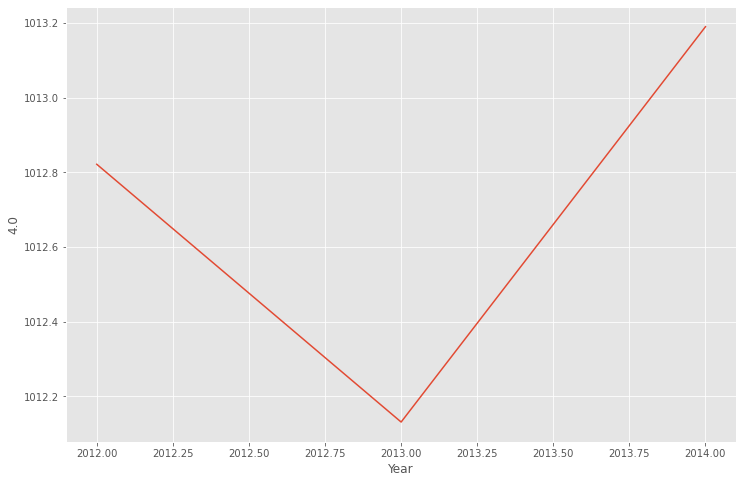

In [55]:
# checking the trend in May
sns.lineplot(data=df_wide[4]) # 5 ==> May

In [56]:
# Pivot the dataframe to a wide-form representation:
df_wide1 = pd.pivot_table(imputed_df, index = "Month", columns = "Year", values = "Hpa")
df_wide1

Year        2012.0       2013.0       2014.0
Month                                       
1.0    1013.108333  1014.423892  1015.446075
2.0    1012.039367  1013.187024  1013.609821
3.0    1012.638575  1013.308710  1013.753226
4.0    1012.821667  1012.131000  1013.190278
5.0    1011.881586  1012.129382  1012.600269
6.0    1011.267005  1011.259167  1011.377222
7.0    1012.254973  1012.082500  1011.908763
8.0    1013.170811  1012.728898  1012.678674
9.0    1013.706103  1013.124444  1013.734074
10.0   1013.347415  1014.254570  1013.420442
11.0   1012.725495  1012.378333  1013.365480
12.0   1012.688441  1013.349489  1013.179185

<AxesSubplot:xlabel='Month'>

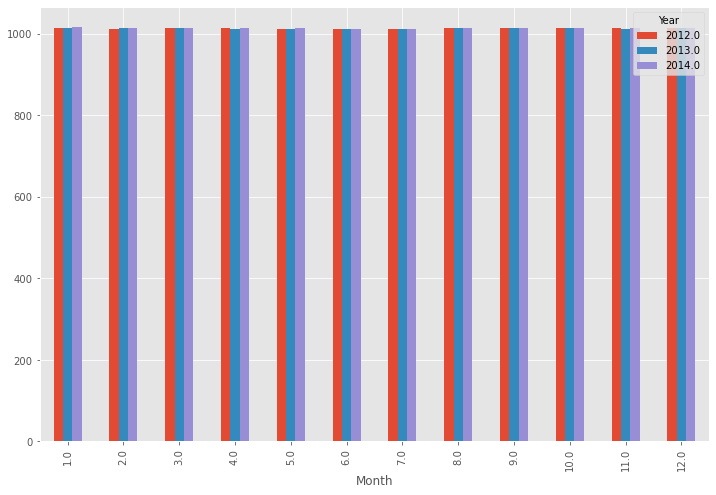

In [57]:
df_wide1.plot.bar()

<AxesSubplot:xlabel='Year'>

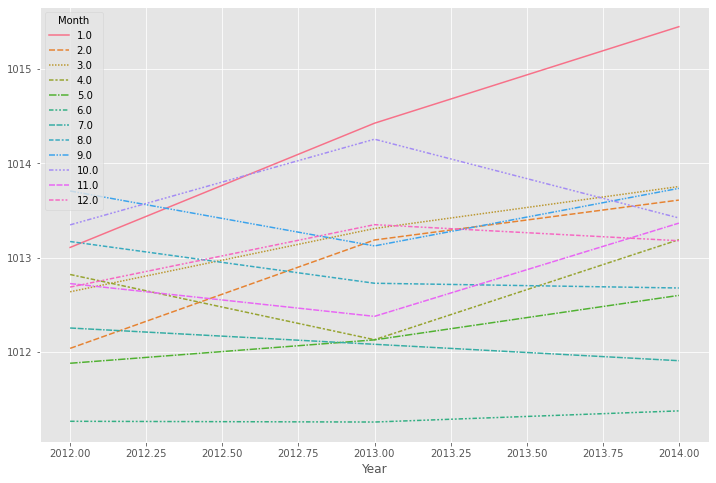

In [58]:
# plots a separate line for each month:
sns.lineplot(data=df_wide, legend='auto')

In [59]:
# Pivot the dataframe to a wide-form representation:
df_wide2 = pd.pivot_table(imputed_df, index = "Day", columns = "Month", values = "Hpa")
df_wide2

Month         1.0          2.0          3.0          4.0          5.0   \
Day                                                                      
1.0    1013.786111  1014.589577  1012.593056  1012.591667  1012.051944   
2.0    1013.891667  1014.101389  1012.513889  1012.637500  1012.256944   
3.0    1014.411471  1013.420000  1013.051389  1013.548611  1012.095556   
4.0    1013.756944  1013.223611  1013.923611  1013.401389  1011.400556   
5.0    1013.505556  1013.426389  1013.641667  1013.480556  1011.685000   
6.0    1013.901389  1012.965000  1013.074722  1013.626389  1011.881111   
7.0    1014.568056  1012.309722  1012.851389  1013.240556  1012.383611   
8.0    1014.870833  1012.241667  1013.204167  1013.151389  1012.505278   
9.0    1014.277778  1012.729167  1012.785278  1013.084167  1012.514444   
10.0   1014.233333  1012.609722  1013.120833  1013.528333  1012.563889   
11.0   1014.532500  1012.715278  1013.490556  1012.942222  1011.892500   
12.0   1014.497222  1012.663889  1014.123611  1012.180556  1012.300000   
13.0   1013.993056  1013.202778  1014.306944  1012.539722  1012.165833   
14.0   1013.431944  1013.138889  1014.315278  1012.901667  1011.765833   
15.0   1013.813611  1012.694444  1014.679167  1012.591389  1011.428333   
16.0   1013.986111  1012.680556  1014.817778  1011.868611  1011.353889   
17.0   1014.075000  1012.927778  1014.148611  1011.871667  1012.019444   
18.0   1014.738889  1013.018056  1013.525000  1011.753056  1012.451111   
19.0   1014.883889  1012.716667  1013.352778  1011.980000  1012.645833   
20.0   1015.111111  1012.883333  1013.444444  1012.141111  1012.663889   
21.0   1015.101944  1013.065278  1012.293056  1012.692778  1012.345278   
22.0   1015.087500  1013.112500  1012.305556  1012.443611  1012.135000   
23.0   1015.038889  1013.193056  1013.113889  1012.185000  1012.585833   
24.0   1014.544444  1012.990278  1013.165278  1012.437222  1012.620833   
25.0   1013.902778  1012.863889  1012.719444  1012.993889  1012.566667   
26.0   1014.144167  1012.579167  1012.381944  1012.967500  1012.393056   
27.0   1014.408333  1012.726111  1012.986944  1012.887778  1012.434722   
28.0   1014.169444  1012.088611  1013.226389  1012.673333  1012.755556   
29.0   1014.081944  1010.929167  1012.768056  1012.622778  1012.520833   
30.0   1014.470833          NaN  1011.963889  1012.465000  1012.250000   
31.0   1014.891667          NaN  1012.350000          NaN  1011.683333   

Month         6.0          7.0          8.0          9.0          10.0  \
Day                                                                      
1.0    1011.394444  1012.131667  1012.621111  1013.283333  1014.151163   
2.0    1011.033333  1012.195278  1012.856389  1013.476389  1015.102083   
3.0    1010.241667  1011.393333  1012.370000  1013.067500  1014.900000   
4.0    1011.020833  1011.151111  1012.201429  1013.213611  1014.341667   
5.0    1010.872222  1010.854444  1012.891667  1013.552333  1014.739583   
6.0    1010.985714  1010.804722  1013.646667  1013.979167  1014.095833   
7.0    1010.002083  1010.901667  1013.306944  1014.025000  1014.064583   
8.0    1009.741667  1011.670556  1012.818333  1014.408333  1013.808333   
9.0    1010.120833  1011.705278  1012.539143  1014.122917  1013.827083   
10.0   1010.020833  1011.641667  1012.629714  1013.927083  1014.435417   
11.0   1009.700000  1012.163056  1013.236140  1013.787500  1013.970833   
12.0   1009.891667  1011.952500  1012.533333  1013.870833  1013.595833   
13.0   1009.654167  1011.279167  1011.866944  1014.445833  1013.791667   
14.0   1009.964583  1011.523611  1012.018056  1013.507317  1013.656901   
15.0   1009.918750  1012.059722  1012.693889  1012.450000  1013.738310   
16.0   1010.420833  1012.973333  1012.624167  1012.754167  1013.592500   
17.0   1010.306250  1012.985278  1012.658333  1012.984615  1013.401111   
18.0   1010.377083  1012.353889  1013.030833  1012.815556  1013.735556   
19.0   1010.918750  1012.569167  1012.900282  1012.308333  1014.086389   
20.

<AxesSubplot:xlabel='Day'>

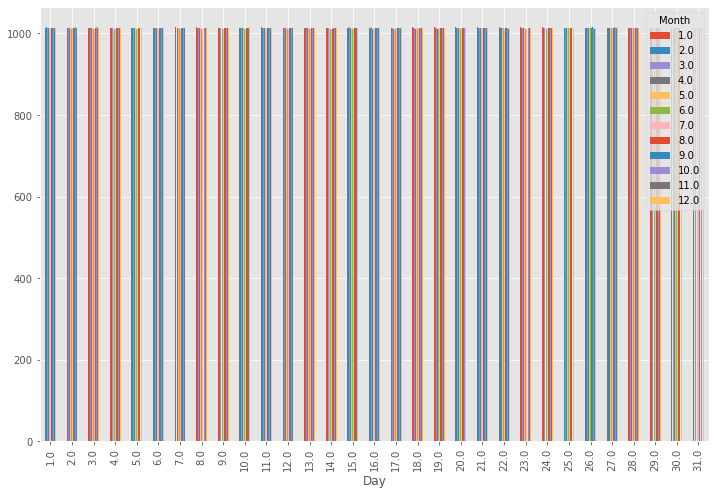

In [60]:
df_wide2.plot.bar()

<AxesSubplot:xlabel='Day'>

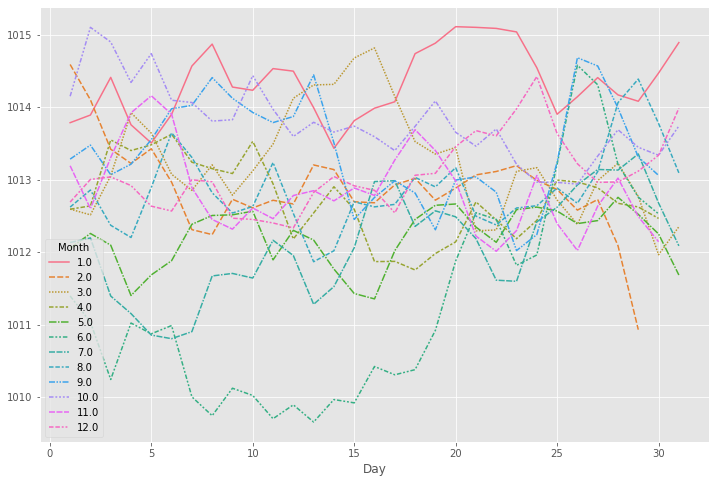

In [61]:
# plots a separate line for each month:
sns.lineplot(data=df_wide2, legend='auto')

In [62]:
# Hpa by temp
imputed_df['Hpa'].groupby(imputed_df.Temp).mean().sort_values()

Temp
37.00    1007.30
31.94    1007.80
32.46    1008.20
29.90    1008.22
36.90    1008.50
          ...   
25.30    1015.78
27.96    1015.82
26.22    1016.44
19.10    1016.60
28.24    1016.64
Name: Hpa, Length: 942, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='Temp'>

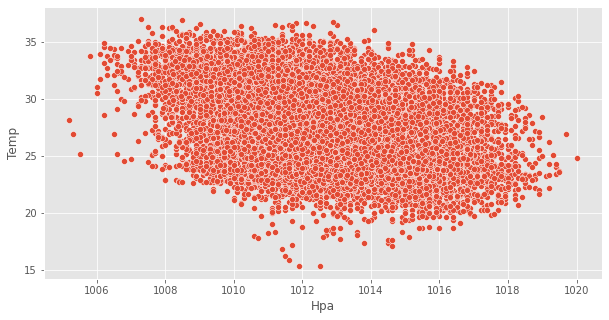

In [63]:
# scatter plot of atmospheric pressure by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="Hpa", y="Temp")

<AxesSubplot:xlabel='Hpa', ylabel='Temp'>

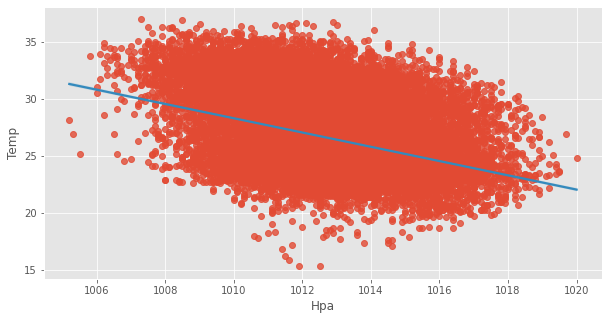

In [64]:
# regression plot of atmospheric pressure by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data = imputed_df, x="Hpa", y="Temp", line_kws={"color": "C1"})

In [65]:
# Hpa by relative humidity
imputed_df['rel_humidity'].groupby(imputed_df.Hpa).mean().sort_values()

Hpa
1005.80    46.000000
1006.30    50.666667
1009.34    52.200000
1006.10    55.500000
1008.96    56.400000
             ...    
1012.92    97.320000
1010.48    97.400000
1013.56    97.500000
1014.58    97.600000
1013.60    97.800000
Name: rel_humidity, Length: 661, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='rel_humidity'>

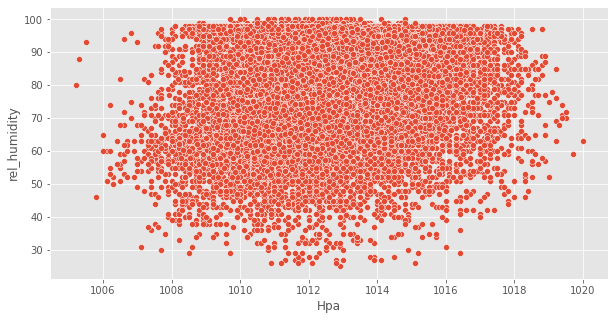

In [66]:
# scatter plot of atmospheric pressure by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="Hpa", y="rel_humidity")

<AxesSubplot:xlabel='Hpa', ylabel='rel_humidity'>

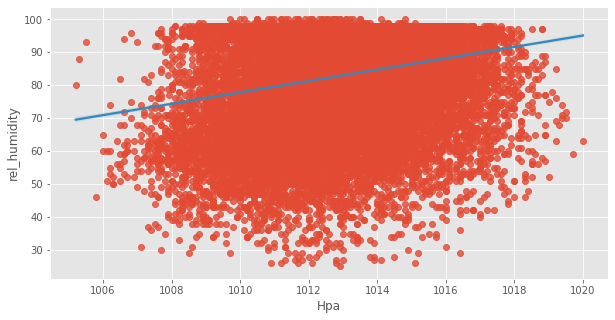

In [67]:
# regression plot of atmospheric pressure by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= imputed_df, x="Hpa", y="rel_humidity", line_kws={"color": "C1"})

In [68]:
# Hpa by wind speed
imputed_df['wind_speed'].groupby(imputed_df.Hpa).mean().sort_values()

Hpa
1013.68    0.34
1011.90    0.34
1012.36    0.36
1012.46    0.38
1010.22    0.38
           ... 
1009.82    1.84
1019.70    2.00
1019.30    2.00
1020.00    2.40
1010.68    3.68
Name: wind_speed, Length: 661, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='wind_speed'>

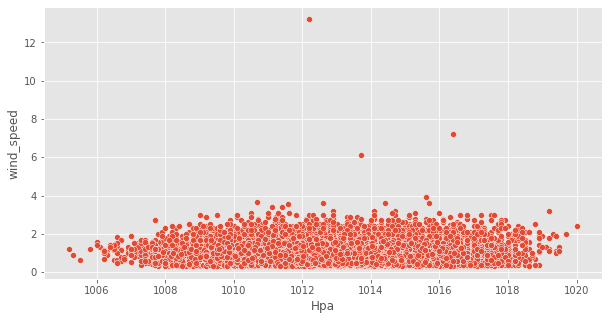

In [69]:
# scatter plot of atmospheric pressure by wind speed
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="Hpa", y="wind_speed")

<AxesSubplot:xlabel='Hpa', ylabel='wind_speed'>

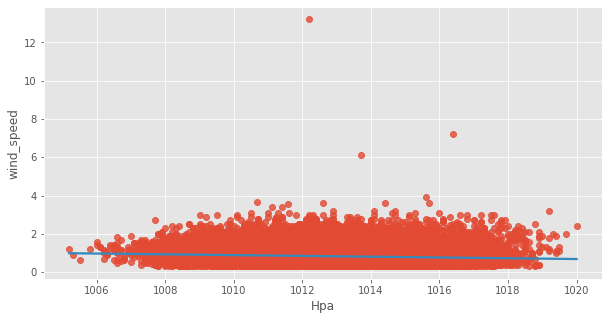

In [70]:
# regression plot of atmospheric pressure by wind speed
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= imputed_df, x="Hpa", y="wind_speed", line_kws={"color": "C1"})

In [71]:
# Average Temperature by year
temp_yr = imputed_df['Temp'].groupby(imputed_df.Year).mean()
temp_yr

Year
2012.0    26.169720
2013.0    26.550950
2014.0    26.774462
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Temp'>

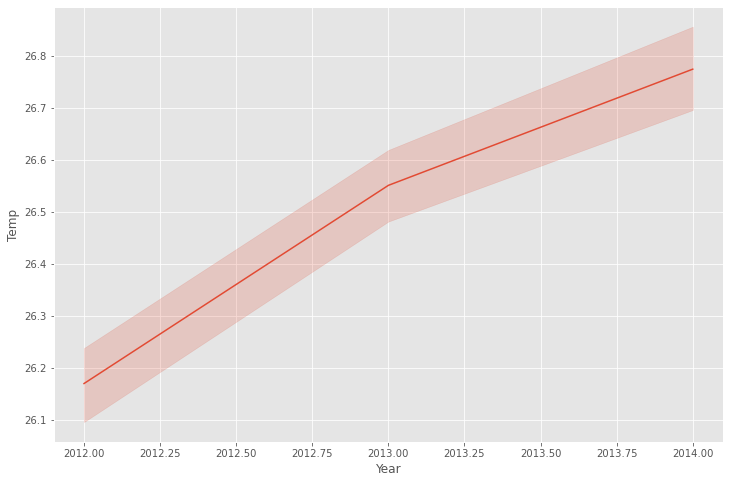

In [72]:
# visualizing Temperature by Year
sns.lineplot(data = imputed_df, x = "Year", y = "Temp")

In [73]:
# average Temperature by Month
imputed_df['Temp'].groupby(imputed_df.Month).mean()

Month
1.0     25.690727
2.0     26.479774
3.0     27.276147
4.0     27.154778
5.0     27.238943
6.0     27.268125
7.0     26.537437
8.0     26.486322
9.0     25.901445
10.0    25.796984
11.0    26.167303
12.0    25.833045
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Temp'>

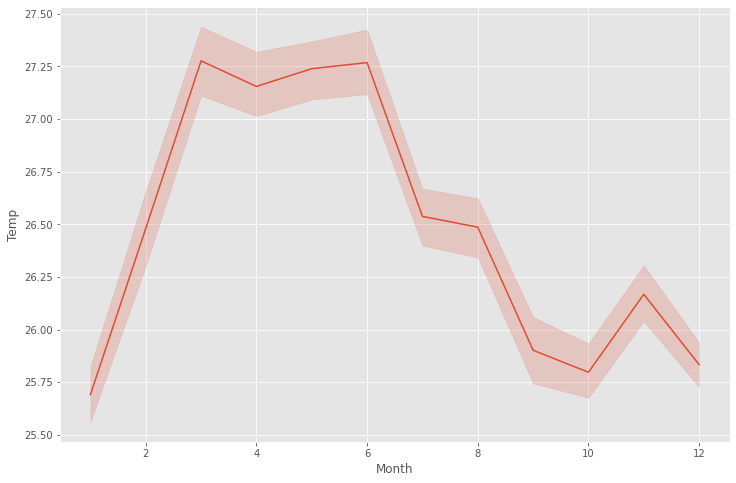

In [74]:
# Visualizing average Hpa by Month
sns.lineplot(data= imputed_df, x="Month", y="Temp")

In [75]:
# average Temp by Day
imputed_df['Temp'].groupby(imputed_df.Day).mean()

Day
1.0     26.317132
2.0     26.385483
3.0     26.397656
4.0     26.404869
5.0     26.428913
6.0     26.299773
7.0     26.506245
8.0     26.427799
9.0     26.469772
10.0    26.212025
11.0    26.601416
12.0    26.410985
13.0    26.558056
14.0    26.602574
15.0    26.659545
16.0    26.442066
17.0    26.381013
18.0    26.467326
19.0    26.651833
20.0    26.580348
21.0    26.519534
22.0    26.701716
23.0    26.785392
24.0    26.531084
25.0    26.549289
26.0    26.586748
27.0    26.645732
28.0    26.463437
29.0    26.330974
30.0    26.616875
31.0    26.410263
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Temp'>

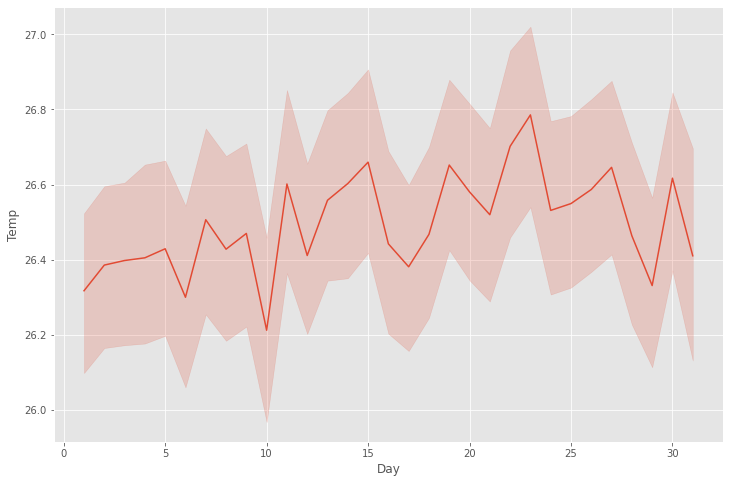

In [76]:
# Visualizing average Temp by Day
sns.lineplot(data= imputed_df, x="Day", y="Temp")

In [77]:
# average Temperature by MST
imputed_df['Temp'].groupby(imputed_df['MST ']).mean()

MST 
1.0     23.969727
2.0     23.719727
3.0     23.562029
4.0     23.433105
5.0     23.338790
6.0     23.234654
7.0     23.161366
8.0     23.594888
9.0     25.232898
10.0    27.145273
11.0    28.999336
12.0    30.249708
13.0    30.990547
14.0    31.274224
15.0    31.234361
16.0    30.697615
17.0    29.961329
18.0    28.946628
19.0    27.527339
20.0    26.284223
21.0    25.529658
22.0    24.996947
23.0    24.584434
24.0    24.252615
Name: Temp, dtype: float64

<AxesSubplot:xlabel='MST ', ylabel='Temp'>

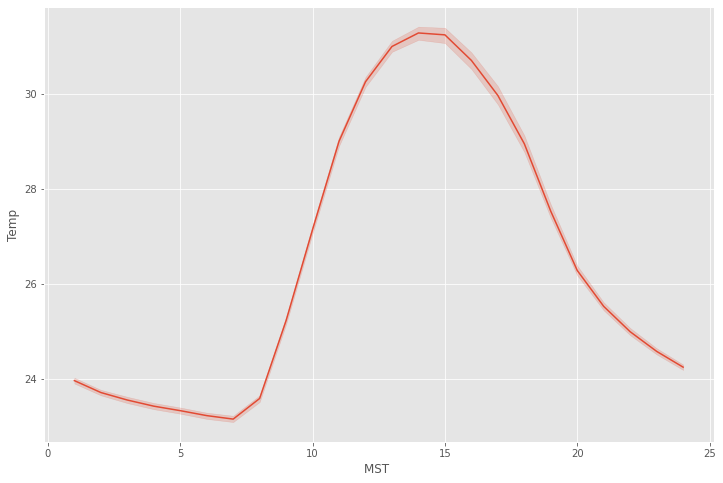

In [78]:
# Visualizing average Temperature by Hour
sns.lineplot(data= imputed_df, x= 'MST ', y="Temp")

In [79]:
# Pivot the dataframe to a wide-form representation:
df_wide3 = pd.pivot_table(imputed_df, index = "Year", columns = "Month", values = "Temp")
df_wide3.head()

Month        1.0        2.0        3.0        4.0        5.0        6.0   \
Year                                                                       
2012.0  25.576532  26.590475  26.492876  26.656417  26.904032  26.506701   
2013.0  26.063405  26.157857  27.509919  27.436111  27.377177  27.163750   
2014.0  25.434247  26.687202  27.825645  27.371806  27.435618  27.580833   

Month        7.0        8.0        9.0        10.0       11.0       12.0  
Year                                                                      
2012.0  25.982715  26.404595  25.604695  25.841840  26.105112  25.570887  
2013.0  26.432446  26.470027  26.173472  25.682527  26.261028  25.869812  
2014.0  27.197151  26.586602  25.843704  25.924767  26.126977  26.068567

<AxesSubplot:xlabel='Year', ylabel='5.0'>

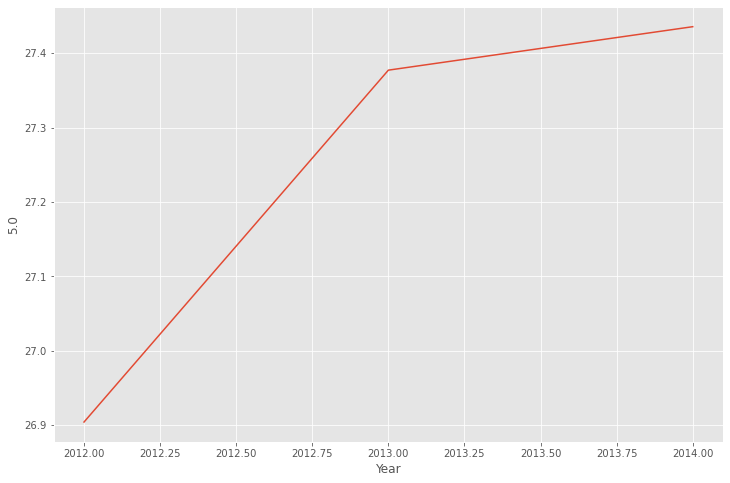

In [80]:
# checking the trend in May
sns.lineplot(data=df_wide3[5]) # 5 ==> May

In [81]:
# Pivot the dataframe to a wide-form representation:
df_wide4 = pd.pivot_table(imputed_df, index = "Month", columns = "Year", values = "Temp")
df_wide4

Year      2012.0     2013.0     2014.0
Month                                 
1.0    25.576532  26.063405  25.434247
2.0    26.590475  26.157857  26.687202
3.0    26.492876  27.509919  27.825645
4.0    26.656417  27.436111  27.371806
5.0    26.904032  27.377177  27.435618
6.0    26.506701  27.163750  27.580833
7.0    25.982715  26.432446  27.197151
8.0    26.404595  26.470027  26.586602
9.0    25.604695  26.173472  25.843704
10.0   25.841840  25.682527  25.924767
11.0   26.105112  26.261028  26.126977
12.0   25.570887  25.869812  26.068567

<AxesSubplot:xlabel='Month'>

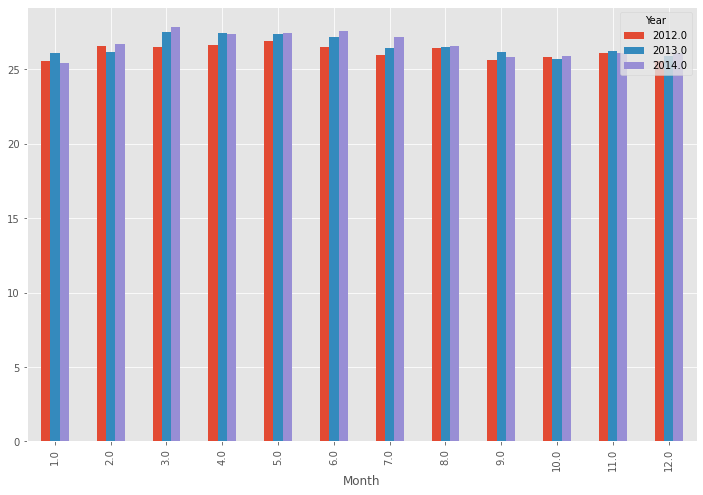

In [82]:
df_wide4.plot.bar()

<AxesSubplot:xlabel='Month'>

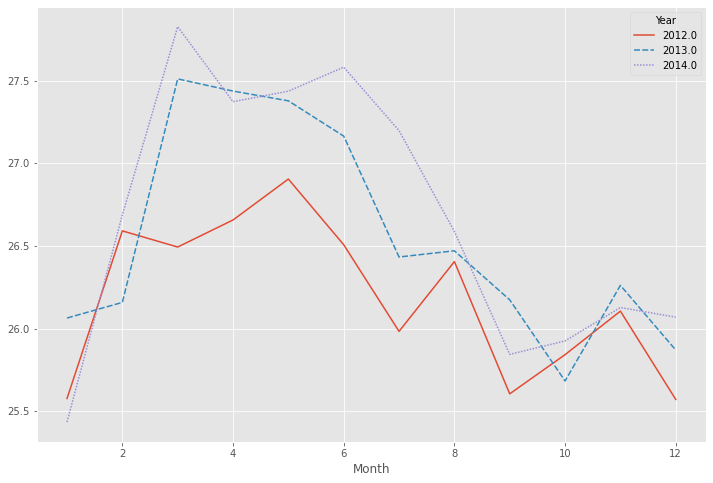

In [83]:
# plots a separate line for each month:
sns.lineplot(data=df_wide4, legend='auto')

In [84]:
# Pivot the dataframe to a wide-form representation:
df_wide5 = pd.pivot_table(imputed_df, index = "Day", columns = "Month", values = "Temp")
df_wide5

Month       1.0        2.0        3.0        4.0        5.0        6.0   \
Day                                                                       
1.0    25.002778  25.993239  27.161111  27.419444  27.395833  26.676389   
2.0    25.818056  25.294444  26.852778  27.537500  27.423333  26.240278   
3.0    25.478824  25.707778  26.581944  26.694444  26.763333  27.068056   
4.0    25.950000  25.619444  26.666389  27.228056  26.974167  26.640278   
5.0    26.467222  26.408333  26.391667  26.880556  27.139722  27.176667   
6.0    25.968056  26.543056  25.712778  26.808611  27.171944  27.563265   
7.0    25.863889  26.518056  26.811111  27.355278  26.847500  28.893750   
8.0    25.175000  26.712500  27.122222  27.273333  26.955000  29.002083   
9.0    24.784722  26.677778  26.693889  26.801944  27.762778  27.170833   
10.0   24.933333  26.381944  26.952778  26.164722  27.149722  27.281250   
11.0   25.694167  26.930556  27.396667  26.710833  28.141389  27.400000   
12.0   25.537500  26.212500  27.198611  27.133889  27.355000  26.029167   
13.0   25.462500  27.236111  27.211111  27.036111  27.438056  26.570833   
14.0   25.684722  27.175000  27.748611  27.081944  27.643056  27.200000   
15.0   25.836389  26.493056  26.809722  27.351667  27.527222  28.116667   
16.0   25.887500  26.680556  26.385278  27.420000  26.877778  27.177083   
17.0   25.458333  26.861944  27.383333  26.662222  26.989444  27.168750   
18.0   25.315278  26.727778  27.443056  27.391667  26.673889  28.033333   
19.0   25.922778  27.097500  27.750000  27.029167  27.641667  28.079167   
20.0   25.702778  27.145833  27.248611  27.512778  27.405556  27.689583   
21.0   25.310000  26.818056  26.896111  27.191944  27.250556  28.137500   
22.0   26.015278  26.925000  27.347222  27.998611  27.988611  27.868750   
23.0   25.925000  26.498611  27.693056  28.025000  27.445833  27.508333   
24.0   25.852778  26.016389  27.755556  27.340278  27.169444  28.108333   
25.0   25.730556  26.123611  27.687500  26.787222  27.080556  28.135417   
26.0   25.976111  25.743056  28.262500  26.926667  27.358333  27.025000   
27.0   25.981944  26.694722  27.999722  27.554722  27.429167  27.248077   
28.0   26.066667  26.545833  28.202778  28.000278  27.069444  26.586111   
29.0   25.327778  25.412500  28.058333  26.633611  27.184722  26.520833   
30.0   26.095833        NaN  28.619444  26.690833  26.576389  26.227778   
31.0   26.175000        NaN  27.516667        NaN  26.577778        NaN   

Month       7.0        8.0        9.0        10.0       11.0       12.0  
Day                                                                      
1.0    26.282500  25.815833  25.966667  25.320930  26.557377  25.844444  
2.0    26.454167  25.831389  26.413611  26.493750  26.500000  25.804167  
3.0    26.197778  26.672500  26.715000  26.641667  26.619444  25.661389  
4.0    25.599167  27.180286  26.641944  25.954167  26.809722  25.466111  
5.0    26.591111  27.015833  25.279000  24.756250  26.501667  25.789722  
6.0    26.962222  25.816389  25.083333  25.289583  26.255000  26.084444  
7.0    26.999444  25.670833  26.270833  24.139583  26.077778  26.570545  
8.0    25.969167  25.969444  25.037500  25.879583  25.787778  26.470877  
9.0    26.426944  26.254286  26.181250  26.250000  26.437500  26.253611  
10.0   26.508333  26.601143  24.847917  25.939583  26.202778  25.402500  
11.0   26.450278  27.167719  24.489583  26.637500  26.122222  25.768333  
12.0   26.631667  26.854444  25.677083  25.802083  25.830556  26.094444  
13.0   26.386944  26.786944  25.608333  25.337500  26.427778  26.475278  
14.0   26.366667  26.910556  25.292683  25.342817  26.279167  26.123333  
15.0   26.543889  26.922500  26.908333  25.643944  26.444444  25.954167  
16.0   26.279167  26.888333  26.500000  25.831944  26.042813  25.573611  
17.0   25.741944  26.236389  26.676923  26.041389  25.900000  25.742778  
18.0   26.289167  26.943333  26.148889  25.817778  25.545833  25.373333  
19.0   26.167500  27.152394  26.577083  25.3

<AxesSubplot:xlabel='Day'>

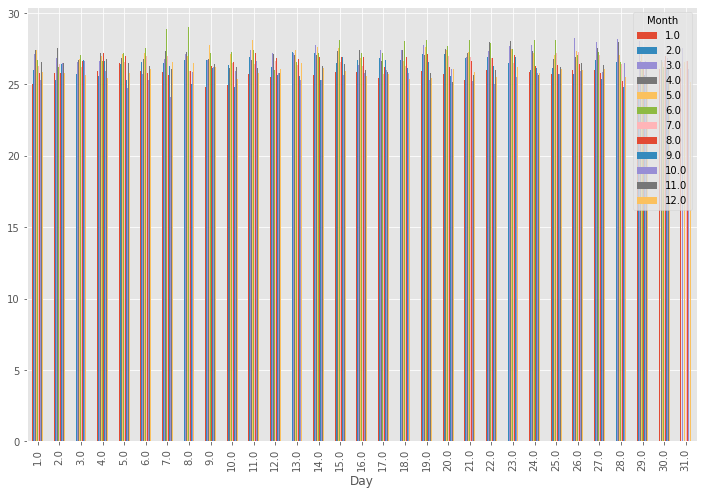

In [85]:
df_wide5.plot.bar()

<AxesSubplot:xlabel='Day'>

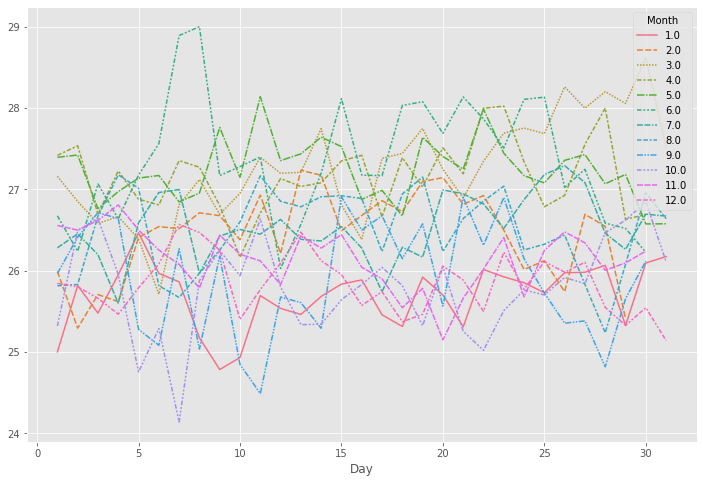

In [86]:
# plots a separate line for each month:
sns.lineplot(data=df_wide5, legend='auto')

In [87]:
# Temp by relative humidity
round(imputed_df['rel_humidity'].groupby(imputed_df.Temp).mean().sort_values(), 2)

Temp
36.80    25.00
36.70    26.50
36.50    27.67
36.90    29.00
36.40    29.67
         ...  
16.80    98.00
16.20    98.00
15.90    98.00
22.38    98.00
15.30    98.00
Name: rel_humidity, Length: 942, dtype: float64

<AxesSubplot:xlabel='rel_humidity', ylabel='Temp'>

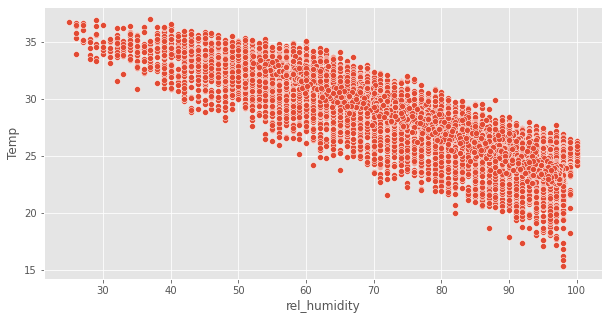

In [88]:
# scatter plot of relative humidity by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="rel_humidity", y="Temp")

<AxesSubplot:xlabel='rel_humidity', ylabel='Temp'>

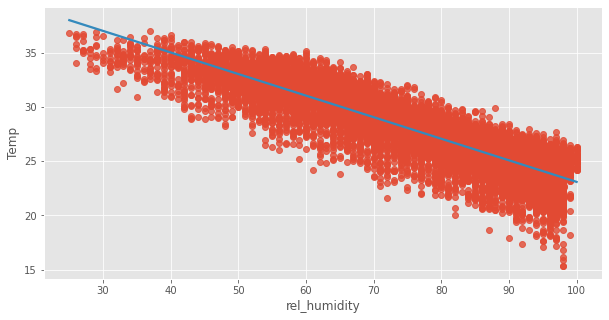

In [89]:
# regression plot of relative humidity by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= imputed_df, x="rel_humidity", y="Temp", line_kws={"color": "C1"})

In [90]:
# Temp by wind speed
round(imputed_df['wind_speed'].groupby(imputed_df.Temp).mean().sort_values(), 2)

Temp
23.30    0.30
17.10    0.30
17.70    0.30
24.18    0.30
17.90    0.35
         ... 
36.10    2.10
36.70    2.20
36.60    2.50
36.80    2.80
31.74    2.90
Name: wind_speed, Length: 942, dtype: float64

<AxesSubplot:xlabel='wind_speed', ylabel='Temp'>

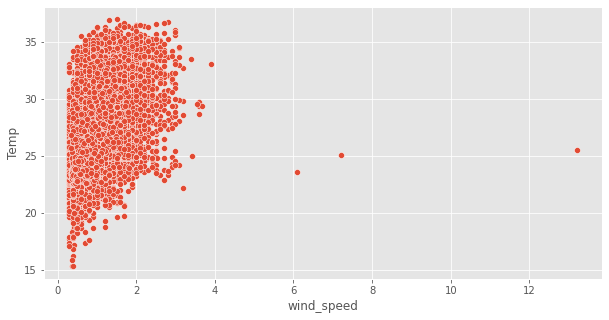

In [91]:
# scatter plot of wind speed by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="wind_speed", y="Temp")

<AxesSubplot:xlabel='wind_speed', ylabel='Temp'>

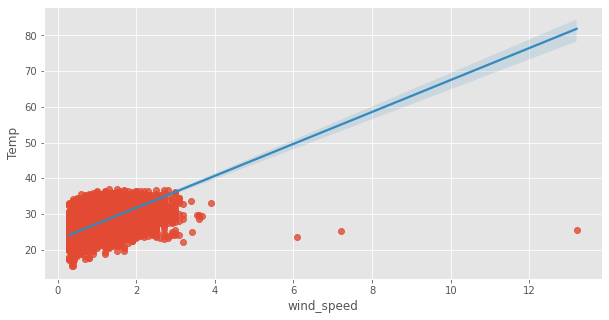

In [92]:
# scatter plot of wind speed by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= imputed_df, x="wind_speed", y="Temp", line_kws={"color": "C1"})

In [93]:
# Average relative humidity by year
rel_hum_yr = round(imputed_df['rel_humidity'].groupby(imputed_df.Year).mean(), 2)
rel_hum_yr

Year
2012.0    83.91
2013.0    83.49
2014.0    81.00
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='rel_humidity'>

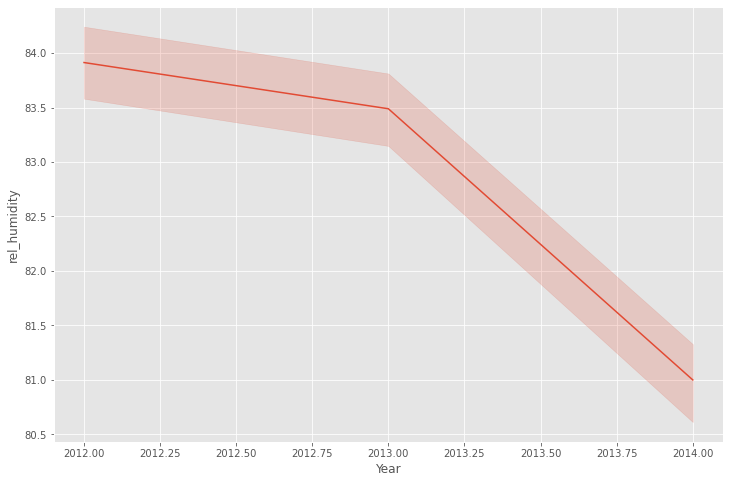

In [94]:
# visualizing Relative humidity by Year
sns.lineplot(data = imputed_df, x = "Year", y = "rel_humidity")

In [95]:
# Average relative humidity by Month
rel_hum_mth = round(imputed_df['rel_humidity'].groupby(imputed_df.Month).mean(), 2)
rel_hum_mth

Month
1.0     79.00
2.0     75.44
3.0     76.15
4.0     83.78
5.0     84.65
6.0     84.44
7.0     84.20
8.0     83.89
9.0     86.54
10.0    87.17
11.0    86.31
12.0    84.60
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='rel_humidity'>

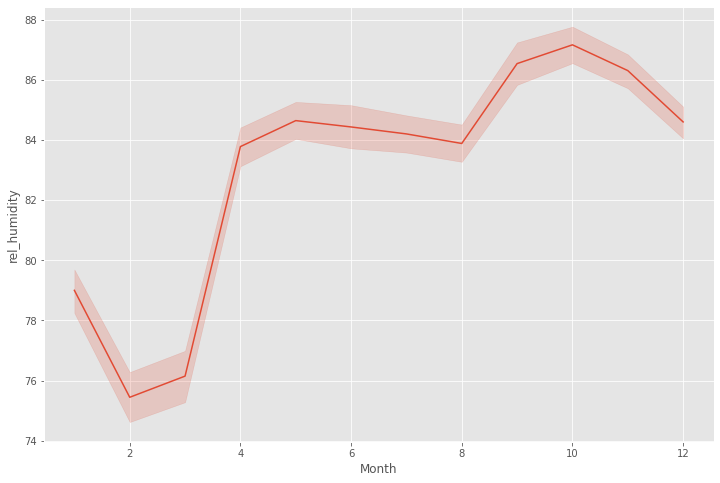

In [96]:
# visualizing Relative humidity by Month
sns.lineplot(data = imputed_df, x = "Month", y = "rel_humidity")

In [97]:
# average Relative humidity by Day
round(imputed_df['rel_humidity'].groupby(imputed_df.Day).mean(), 2)

Day
1.0     83.94
2.0     83.78
3.0     83.89
4.0     83.15
5.0     83.01
6.0     82.82
7.0     82.47
8.0     83.06
9.0     82.47
10.0    83.84
11.0    82.30
12.0    83.53
13.0    82.53
14.0    82.78
15.0    82.89
16.0    83.65
17.0    83.60
18.0    83.32
19.0    81.66
20.0    81.69
21.0    82.31
22.0    82.01
23.0    81.55
24.0    82.65
25.0    82.37
26.0    82.47
27.0    82.14
28.0    82.62
29.0    83.91
30.0    82.96
31.0    82.76
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='rel_humidity'>

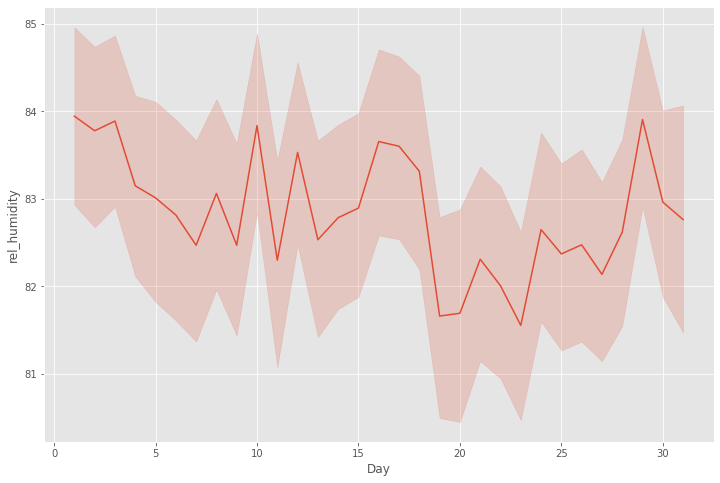

In [98]:
# Visualizing average relative humidity by Day
sns.lineplot(data= imputed_df, x="Day", y="rel_humidity")

In [99]:
# average relative humidity by MST
imputed_df['rel_humidity'].groupby(imputed_df['MST ']).mean()

MST 
1.0     94.848148
2.0     95.501071
3.0     95.792195
4.0     95.951562
5.0     96.009561
6.0     96.066732
7.0     96.068683
8.0     94.930146
9.0     87.514537
10.0    78.480078
11.0    70.516211
12.0    65.280897
13.0    62.328320
14.0    61.637659
15.0    61.905756
16.0    64.399609
17.0    67.667644
18.0    72.283871
19.0    79.148141
20.0    85.256305
21.0    88.827175
22.0    91.082975
23.0    92.758789
24.0    93.943976
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='MST ', ylabel='rel_humidity'>

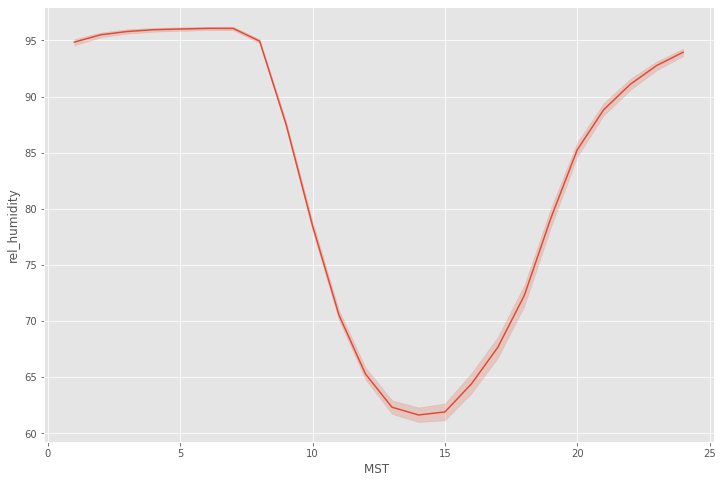

In [100]:
# Visualizing average relative humidity by Hour
sns.lineplot(data= imputed_df, x= 'MST ', y="rel_humidity")

In [101]:
# Pivot the dataframe to a wide-form representation:
df_wide6 = pd.pivot_table(imputed_df, index = "Year", columns = "Month", values = "rel_humidity")
df_wide6.head()

Month        1.0        2.0        3.0        4.0        5.0        6.0   \
Year                                                                       
2012.0  82.313710  78.355396  82.309140  84.085278  84.348118  84.860914   
2013.0  79.078649  78.910119  76.818817  85.098611  85.531989  84.236111   
2014.0  75.612903  68.968750  69.318011  82.163889  84.060484  84.519444   

Month        7.0        8.0        9.0        10.0       11.0       12.0  
Year                                                                      
2012.0  84.437097  82.979730  86.676056  85.861434  85.904153  85.876613  
2013.0  84.431989  84.465054  86.224167  88.243280  85.661667  82.932258  
2014.0  83.743548  84.218508  87.881481  87.570516  87.329661  85.018258

<AxesSubplot:xlabel='Year', ylabel='5.0'>

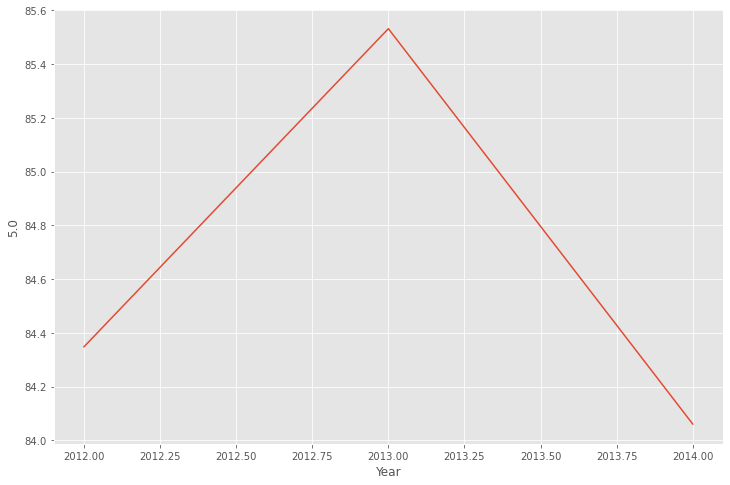

In [102]:
# checking the trend in May
sns.lineplot(data=df_wide6[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

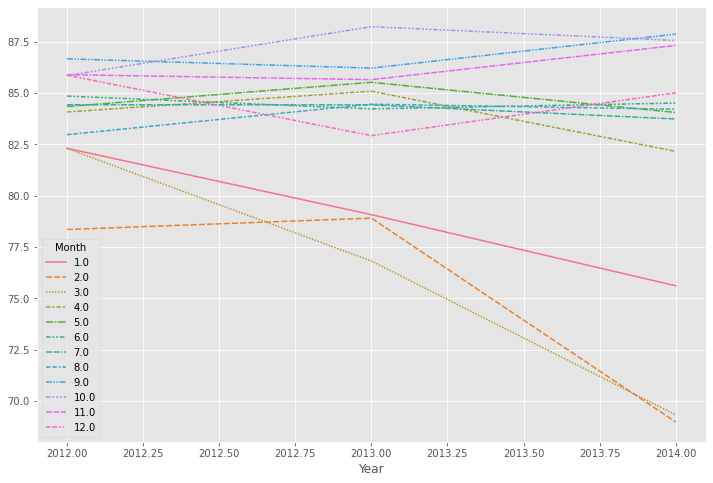

In [103]:
# plots a separate line for each month:
sns.lineplot(data=df_wide6, legend='auto')

In [104]:
# Pivot the dataframe to a wide-form representation:
df_wide7 = pd.pivot_table(imputed_df, index = "Month", columns = "Year", values = "rel_humidity")
df_wide7

Year      2012.0     2013.0     2014.0
Month                                 
1.0    82.313710  79.078649  75.612903
2.0    78.355396  78.910119  68.968750
3.0    82.309140  76.818817  69.318011
4.0    84.085278  85.098611  82.163889
5.0    84.348118  85.531989  84.060484
6.0    84.860914  84.236111  84.519444
7.0    84.437097  84.431989  83.743548
8.0    82.979730  84.465054  84.218508
9.0    86.676056  86.224167  87.881481
10.0   85.861434  88.243280  87.570516
11.0   85.904153  85.661667  87.329661
12.0   85.876613  82.932258  85.018258

<AxesSubplot:xlabel='Month'>

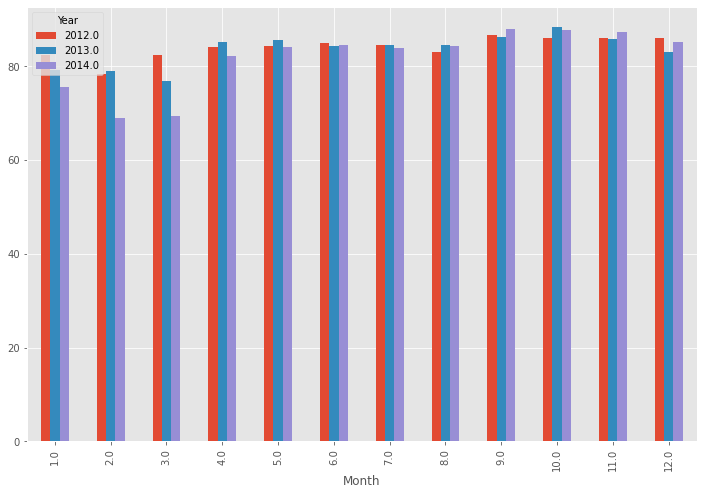

In [105]:
df_wide7.plot.bar()

<AxesSubplot:xlabel='Month'>

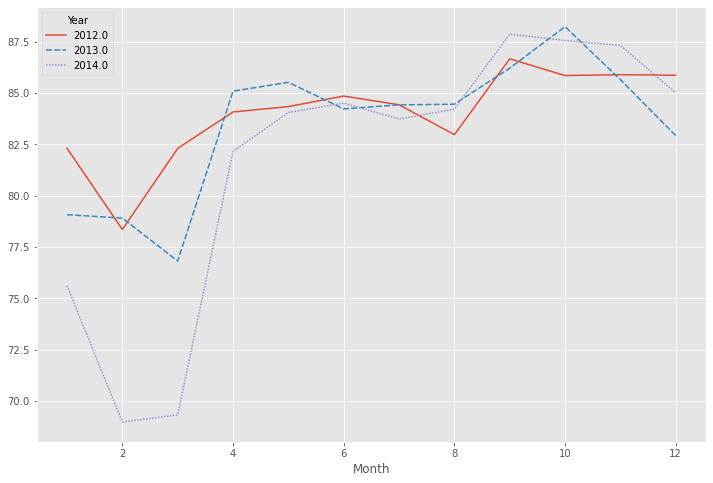

In [106]:
# plots a separate line for each month:
sns.lineplot(data=df_wide7, legend='auto')

In [107]:
# Pivot the dataframe to a wide-form representation:
df_wide8 = pd.pivot_table(imputed_df, index = "Day", columns = "Month", values = "rel_humidity")
df_wide8

Month       1.0        2.0        3.0        4.0        5.0        6.0   \
Day                                                                       
1.0    86.652778  73.109859  76.777778  81.013889  84.986111  87.236111   
2.0    85.305556  76.166667  77.916667  79.986111  85.122222  88.333333   
3.0    85.788235  77.077778  81.180556  84.902778  86.211111  83.750000   
4.0    81.152778  74.791667  75.633333  81.991667  85.783333  87.111111   
5.0    77.713889  73.152778  74.416667  85.347222  86.608333  84.813889   
6.0    78.291667  74.536111  77.263889  85.436111  85.363889  83.102041   
7.0    79.375000  75.750000  76.138889  80.580556  85.497222  78.875000   
8.0    83.402778  77.013889  74.763889  79.963889  85.755556  80.041667   
9.0    86.250000  74.125000  74.216667  82.744444  82.869444  87.104167   
10.0   86.069444  72.777778  75.513889  86.388889  86.044444  86.541667   
11.0   82.013889  71.541667  71.336111  84.297222  81.544444  87.395833   
12.0   83.083333  78.902778  72.319444  82.908333  86.066667  89.791667   
13.0   82.013889  72.819444  76.111111  83.508333  83.488889  85.791667   
14.0   80.930556  71.791667  71.319444  84.611111  85.769444  84.729167   
15.0   79.675000  74.138889  77.402778  82.911111  85.708333  83.291667   
16.0   77.736111  76.152778  83.255556  82.997222  87.088889  87.416667   
17.0   75.333333  77.447222  77.958333  86.108333  86.269444  85.270833   
18.0   78.263889  77.125000  76.527778  84.116667  86.997222  81.395833   
19.0   75.147222  74.419444  73.361111  85.672222  81.611111  81.020833   
20.0   76.888889  72.097222  74.333333  83.208333  83.555556  82.833333   
21.0   79.838889  72.736111  78.308333  83.852778  81.977778  83.520833   
22.0   76.680556  72.958333  76.902778  83.058333  80.072222  84.479167   
23.0   77.236111  74.652778  74.666667  81.955556  83.105556  84.770833   
24.0   76.638889  78.919444  75.708333  84.113889  83.875000  82.187500   
25.0   76.041667  79.111111  76.041667  85.502778  82.930556  80.687500   
26.0   73.388889  79.083333  75.583333  85.875000  83.319444  84.041667   
27.0   71.333333  77.541667  75.747222  84.008333  83.291667  81.634615   
28.0   72.125000  78.236111  74.916667  81.819444  83.805556  84.541667   
29.0   76.805556  88.166667  77.180556  87.588889  85.055556  83.000000   
30.0   74.319444        NaN  76.083333  87.008333  87.694444  84.652778   
31.0   73.930556        NaN  81.722222        NaN  86.583333        NaN   

Month       7.0        8.0        9.0        10.0       11.0       12.0  
Day                                                                      
1.0    86.069444  85.866667  86.358333  91.116279  82.498361  88.166667  
2.0    84.416667  85.338889  85.908333  84.916667  83.929577  88.375000  
3.0    84.088889  83.108333  84.050000  84.333333  84.416667  88.013889  
4.0    87.741667  81.365714  84.247222  86.458333  83.694444  88.866667  
5.0    84.755556  82.730556  89.876667  89.500000  84.072222  86.452778  
6.0    84.016667  86.269444  89.187500  87.604167  84.722222  81.802778  
7.0    85.505556  87.333333  83.333333  93.979167  85.833333  79.705455  
8.0    86.425000  86.380556  91.270833  84.766667  88.372222  80.308772  
9.0    84.516667  85.094286  83.208333  83.041667  86.180556  82.341667  
10.0   84.647222  82.157143  87.812500  85.145833  87.569444  88.000000  
11.0   84.811111  80.326316  91.750000  82.895833  87.277778  87.027778  
12.0   82.158333  81.563889  87.104167  88.895833  89.222222  85.419444  
13.0   85.725000  82.605556  87.333333  89.854167  84.930556  81.338889  
14.0   86.294444  83.386111  88.975610  89.994366  85.027778  84.000000  
15.0   85.919444  83.113889  83.666667  89.081690  84.152778  86.402778  
16.0   85.513889  81.622222  84.916667  88.400000  83.837500  87.033333  
17.0   87.358333  85.850000  82.307692  86.466667  86.520833  87.027778  
18.0   85.347222  81.861111  87.133333  87.436111  87.416667  88.322222  
19.0   85.550000  80.270423  84.083333  88.4

<AxesSubplot:ylabel='Day'>

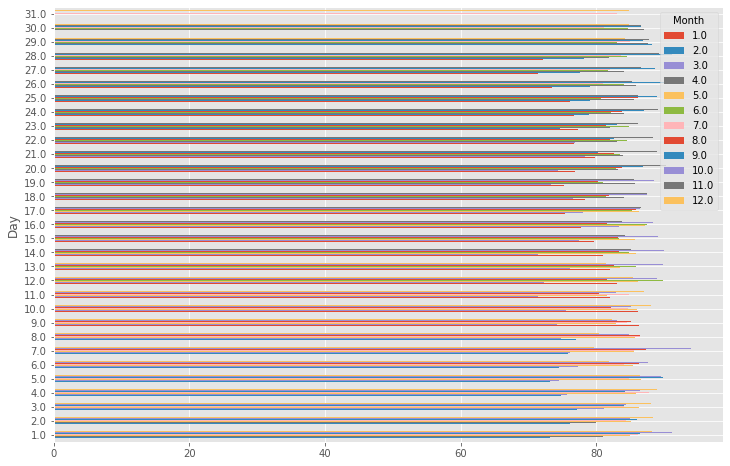

In [108]:
df_wide8.plot.barh()

<AxesSubplot:xlabel='Day'>

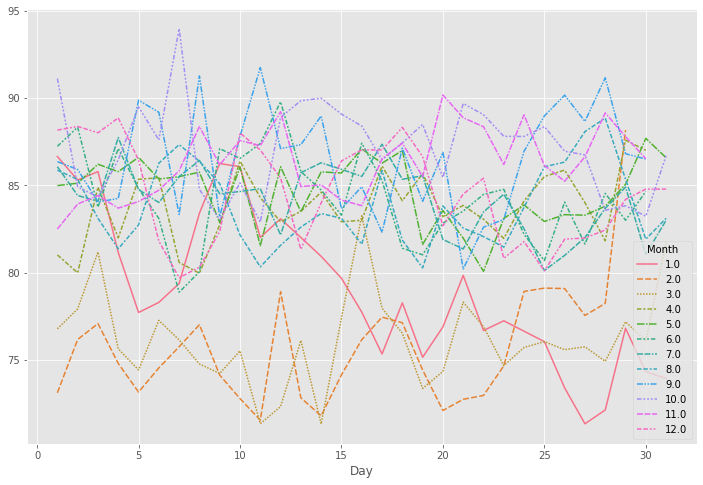

In [109]:
# plots a separate line for each month:
sns.lineplot(data=df_wide8, legend='auto')

<AxesSubplot:xlabel='wind_speed', ylabel='rel_humidity'>

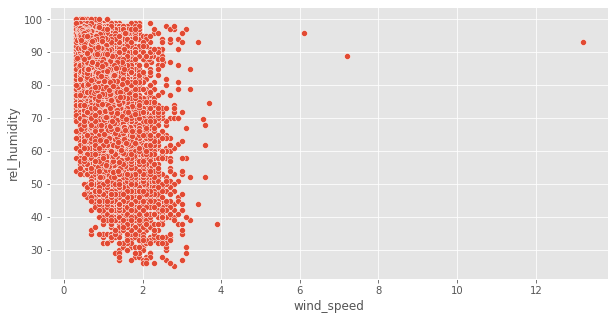

In [110]:
# scatter plot of wind speed by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= imputed_df, x="wind_speed", y="rel_humidity")

<AxesSubplot:xlabel='wind_speed', ylabel='rel_humidity'>

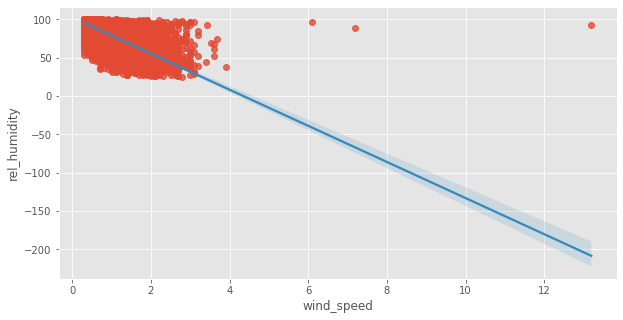

In [111]:
# scatter plot of wind speed by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= imputed_df, x="wind_speed", y="rel_humidity", line_kws={"color": "C1"})

In [112]:
# Average wind speed by year
win_speed_yr = round(imputed_df['wind_speed'].groupby(imputed_df.Year).mean(), 2)
win_speed_yr

Year
2012.0    0.80
2013.0    0.81
2014.0    0.89
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='wind_speed'>

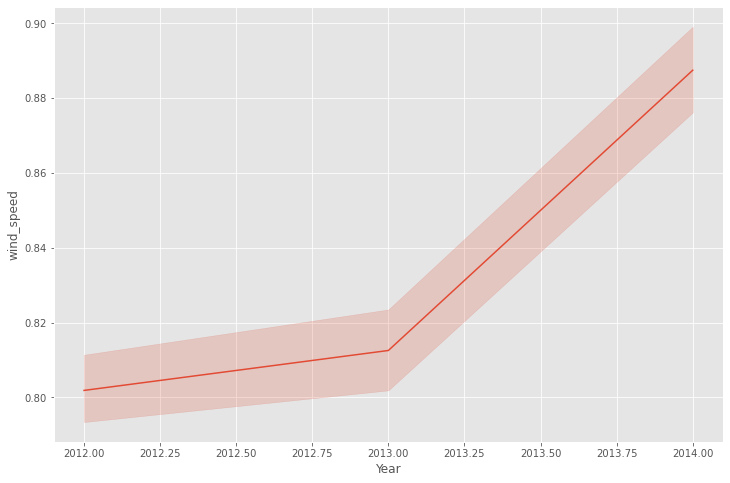

In [113]:
# visualizing wind speed by Year
sns.lineplot(data = imputed_df, x = "Year", y = "wind_speed")

In [114]:
# Average wind speed by Month
win_spd_mth = round(imputed_df['wind_speed'].groupby(imputed_df.Month).mean(), 2)
win_spd_mth

Month
1.0     0.98
2.0     0.99
3.0     0.95
4.0     0.80
5.0     0.77
6.0     0.73
7.0     0.71
8.0     0.76
9.0     0.76
10.0    0.80
11.0    0.79
12.0    0.90
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='wind_speed'>

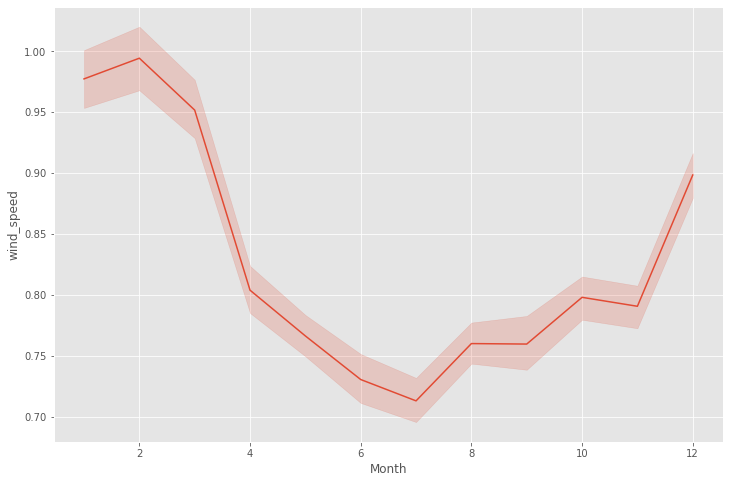

In [115]:
# visualizing wind speed by Month
sns.lineplot(data = imputed_df, x = "Month", y = "wind_speed")

In [116]:
# average wind speed by Day
round(imputed_df['wind_speed'].groupby(imputed_df.Day).mean(), 2)

Day
1.0     0.83
2.0     0.82
3.0     0.80
4.0     0.87
5.0     0.86
6.0     0.85
7.0     0.80
8.0     0.80
9.0     0.84
10.0    0.85
11.0    0.88
12.0    0.81
13.0    0.83
14.0    0.82
15.0    0.81
16.0    0.81
17.0    0.80
18.0    0.83
19.0    0.84
20.0    0.86
21.0    0.85
22.0    0.83
23.0    0.81
24.0    0.80
25.0    0.82
26.0    0.85
27.0    0.85
28.0    0.85
29.0    0.83
30.0    0.85
31.0    0.87
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='wind_speed'>

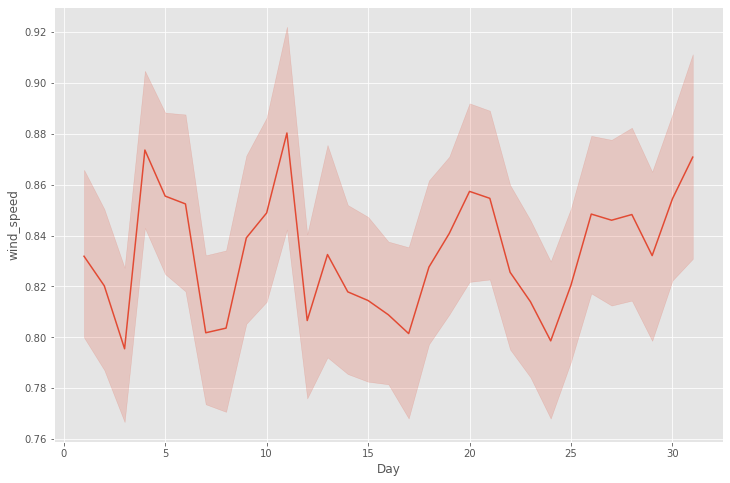

In [117]:
# Visualizing average wind speed by Day
sns.lineplot(data= imputed_df, x="Day", y="wind_speed")

In [118]:
# average wind speed by MST
imputed_df['wind_speed'].groupby(imputed_df['MST ']).mean()

MST 
1.0     0.510195
2.0     0.513009
3.0     0.510420
4.0     0.513906
5.0     0.534107
6.0     0.537541
7.0     0.533561
8.0     0.602693
9.0     0.897776
10.0    1.009629
11.0    1.145781
12.0    1.286452
13.0    1.378223
14.0    1.355415
15.0    1.357580
16.0    1.284516
17.0    1.190205
18.0    1.035288
19.0    0.826849
20.0    0.702424
21.0    0.623245
22.0    0.563464
23.0    0.539102
24.0    0.532262
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='MST ', ylabel='wind_speed'>

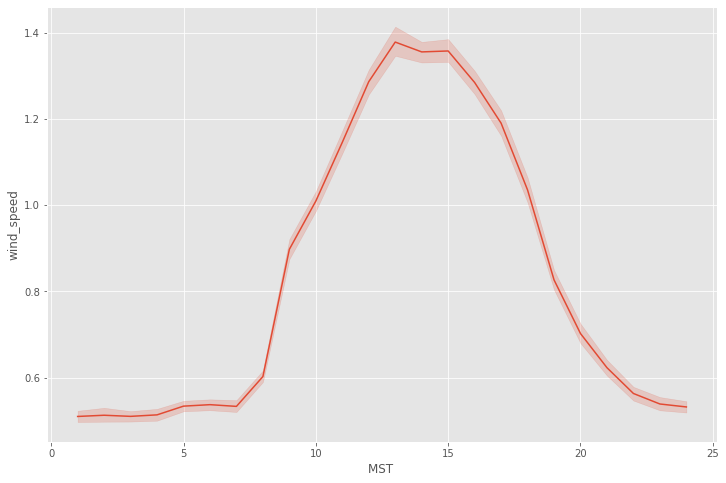

In [119]:
# Visualizing average relative humidity by Hour
sns.lineplot(data= imputed_df, x= 'MST ', y="wind_speed")

In [120]:
# Pivot the dataframe to a wide-form representation:
df_wide9 = pd.pivot_table(imputed_df, index = "Year", columns = "Month", values = "wind_speed")
df_wide9.head()

Month       1.0       2.0       3.0      4.0       5.0       6.0       7.0   \
Year                                                                          
2012.0  0.878656  0.933496  0.809301  0.76000  0.745215  0.739391  0.714892   
2013.0  0.917297  0.966756  0.860054  0.83075  0.731075  0.726833  0.696505   
2014.0  1.135618  1.084673  1.185726  0.82100  0.822849  0.732000  0.727930   

Month       8.0       9.0       10.0      11.0      12.0  
Year                                                      
2012.0  0.761784  0.753427  0.816752  0.806262  0.858360  
2013.0  0.755672  0.760472  0.779839  0.779889  0.955914  
2014.0  0.762956  0.791852  0.797445  0.787994  0.880253

<AxesSubplot:xlabel='Year', ylabel='5.0'>

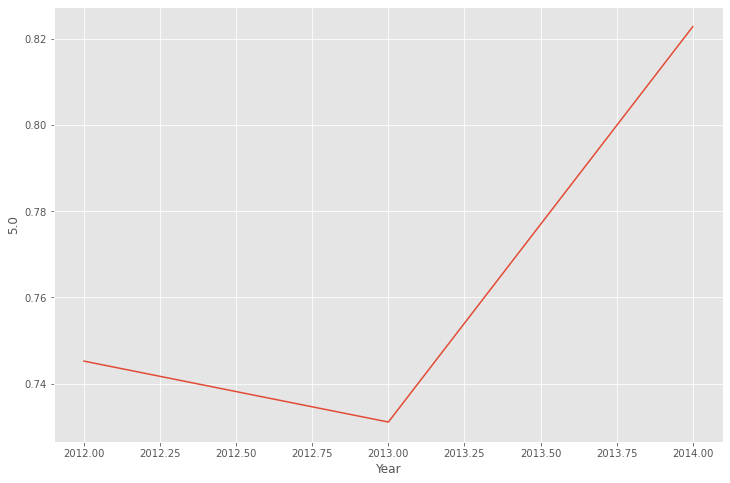

In [121]:
# checking the trend in May
sns.lineplot(data=df_wide9[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

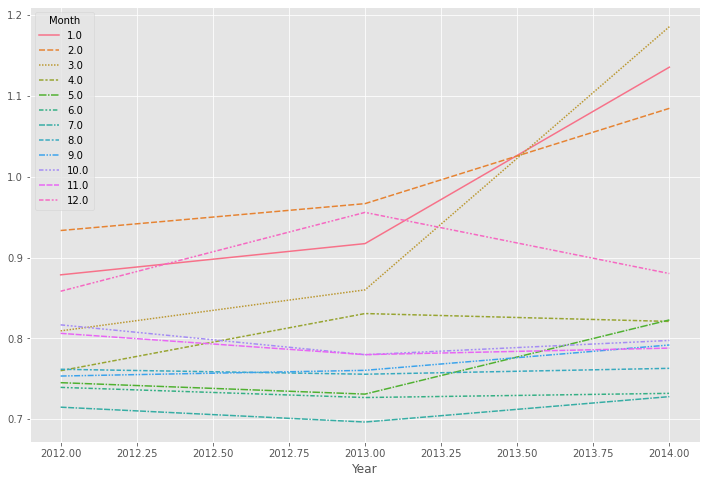

In [122]:
# plots a separate line for each month:
sns.lineplot(data=df_wide9, legend='auto')

In [123]:
# Pivot the dataframe to a wide-form representation:
df_wide10 = pd.pivot_table(imputed_df, index = "Month", columns = "Year", values = "wind_speed")
df_wide10

Year     2012.0    2013.0    2014.0
Month                              
1.0    0.878656  0.917297  1.135618
2.0    0.933496  0.966756  1.084673
3.0    0.809301  0.860054  1.185726
4.0    0.760000  0.830750  0.821000
5.0    0.745215  0.731075  0.822849
6.0    0.739391  0.726833  0.732000
7.0    0.714892  0.696505  0.727930
8.0    0.761784  0.755672  0.762956
9.0    0.753427  0.760472  0.791852
10.0   0.816752  0.779839  0.797445
11.0   0.806262  0.779889  0.787994
12.0   0.858360  0.955914  0.880253

<AxesSubplot:xlabel='Month'>

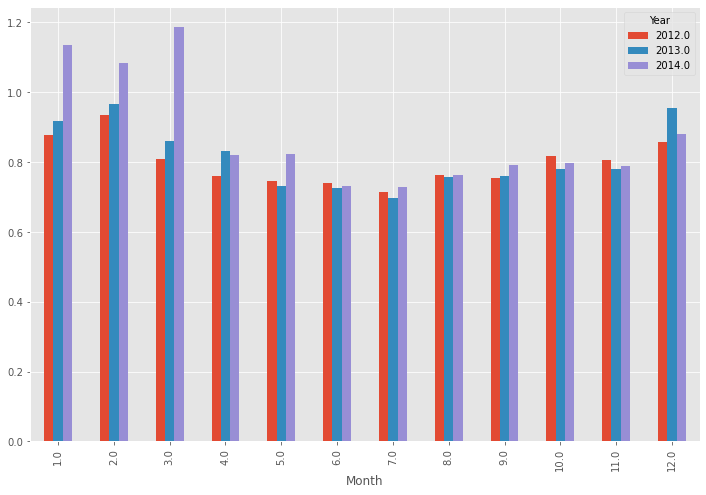

In [124]:
df_wide10.plot.bar()

<AxesSubplot:xlabel='Month'>

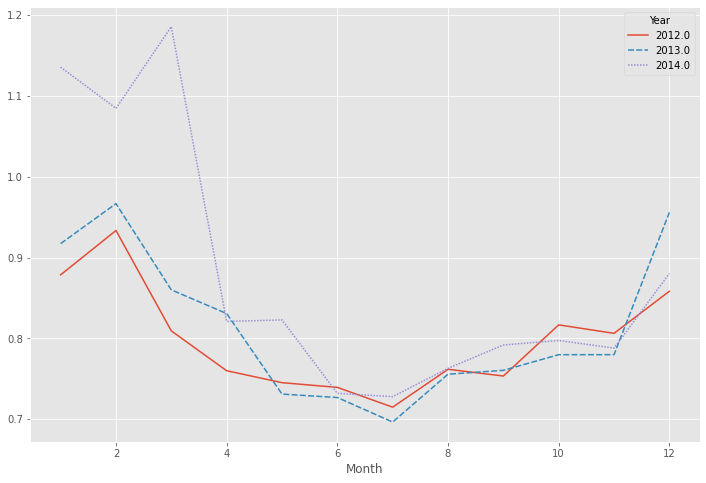

In [125]:
# plots a separate line for each month:
sns.lineplot(data=df_wide10, legend='auto')

In [126]:
# Pivot the dataframe to a wide-form representation:
df_wide11 = pd.pivot_table(imputed_df, index = "Day", columns = "Month", values = "wind_speed")
df_wide11

Month      1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
Day                                                                           
1.0    0.977778  1.156056  0.939722  0.836944  0.718333  0.743056  0.703056   
2.0    0.819167  0.924167  0.867222  0.818056  0.833611  0.781944  0.812500   
3.0    0.752059  0.836667  0.786667  0.780278  0.752500  0.775833  0.815000   
4.0    0.917500  0.967500  0.946667  0.806944  0.779444  0.753889  0.788333   
5.0    0.852222  0.984167  1.005556  0.814167  0.787500  0.705278  0.728056   
6.0    0.983333  1.011389  0.927778  0.818889  0.837222  0.716735  0.662222   
7.0    0.893056  0.952500  0.965278  0.820833  0.745278  0.772917  0.691667   
8.0    0.739444  0.901667  1.032222  0.833889  0.783889  0.812083  0.715833   
9.0    0.743333  1.055278  0.984167  0.842778  0.842222  0.824583  0.760000   
10.0   0.797222  1.039722  1.070556  0.766111  0.883333  0.869583  0.710833   
11.0   0.992778  1.066667  1.139722  0.785556  0.850278  0.804583  0.820000   
12.0   0.923889  0.925000  1.095000  0.877500  0.752500  0.709583  0.708056   
13.0   0.763889  1.070278  0.914444  0.815556  0.814444  0.737917  0.892778   
14.0   0.860556  1.106111  1.101667  0.831667  0.739167  0.655000  0.655000   
15.0   0.900833  1.093333  1.017500  0.851944  0.803611  0.599583  0.648333   
16.0   1.112500  0.974722  0.836944  0.813889  0.735833  0.644167  0.702222   
17.0   1.194167  0.917222  0.927500  0.771667  0.670000  0.672917  0.655833   
18.0   1.082222  0.911667  0.922500  0.822778  0.711111  0.725417  0.729722   
19.0   1.086667  0.983333  0.920000  0.774722  0.754722  0.660417  0.562778   
20.0   1.068889  1.095000  0.876944  0.788889  0.755833  0.768333  0.653611   
21.0   1.025833  1.187500  0.870556  0.818889  0.786667  0.695833  0.696111   
22.0   1.061944  0.998889  0.905000  0.778611  0.739444  0.602083  0.630556   
23.0   0.995278  0.955278  1.046667  0.781389  0.705000  0.592083  0.615278   
24.0   0.939167  0.901667  0.935556  0.785000  0.725556  0.665417  0.658333   
25.0   0.978611  0.899722  1.001667  0.805000  0.780000  0.647083  0.727222   
26.0   1.095000  1.070278  1.001667  0.784444  0.734167  0.757917  0.698056   
27.0   1.255556  0.999444  0.925000  0.803333  0.680556  0.754231  0.707500   
28.0   1.174722  0.921667  0.971667  0.796667  0.713056  0.769722  0.713889   
29.0   1.120278  0.800000  0.863611  0.741944  0.741111  0.818056  0.753611   
30.0   1.157500       NaN  0.859722  0.749167  0.793889  0.752778  0.753611   
31.0   1.018333       NaN  0.843333       NaN  0.807500       NaN  0.736389   

Month      8.0       9.0       10.0      11.0      12.0  
Day                                                      
1.0    0.760000  0.858889  0.612558  0.909836  0.694444  
2.0    0.853333  0.708611  0.770000  0.864507  0.773611  
3.0    0.826944  0.791944  0.763333  0.815833  0.835556  
4.0    0.902286  0.900556  0.858333  0.858611  0.999444  
5.0    0.926944  0.900000  0.865833  0.851389  0.856111  
6.0    0.876111  0.901667  0.880833  0.740278  0.855556  
7.0    0.699444  0.782083  0.695417  0.654444  0.926182  
8.0    0.649722  0.685000  0.768750  0.766667  0.932632  
9.0    0.749429  0.834167  0.795833  0.724722  0.889444  
10.0   0.831143  0.975000  0.826250  0.728056  0.730000  
11.0   0.760702  0.824583  1.025417  0.744722  0.728889  
12.0   0.687222  0.720000  0.778333  0.661944  0.769444  
13.0   0.746944  0.771667  0.755417  0.777222  0.852500  
14.0   0.691389  0.710732  0.736338  0.761667  0.863611  
15.0   0.745278  0.631667  0.767606  0.690556  0.829167  
16.0   0.764167  0.681667  0.731667  0.800625  0.767222  
17.0   0.739167  0.644615  0.769444  0.746250  0.747222  
18.0   0.833333  0.651556  0.790833  0.810417  0.834167  
19.0   0.785634  0.738750  0.881111  0.954583  0.930278  
20.0   0.736111  0.725833  0.841667  0.902667  1.008889  
21.0   0.701667  0.735833  0.888056  0.792500  0.963889  
22.0   0.727222  0.835833  0.803056  0.809444  0.943611  


<AxesSubplot:xlabel='Day'>

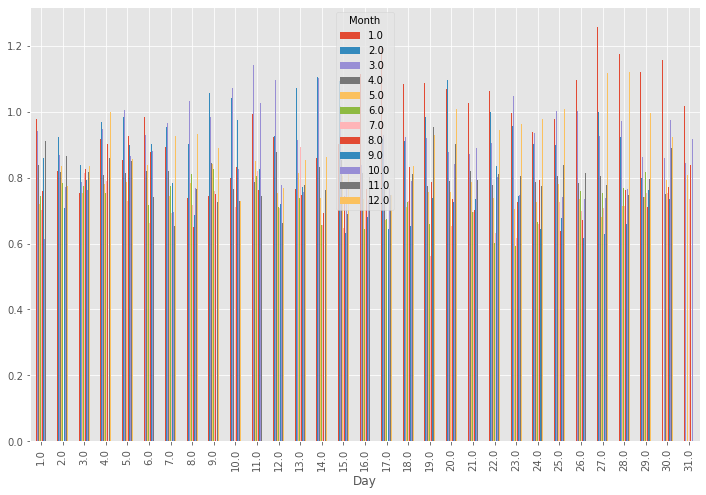

In [127]:
df_wide11.plot.bar()

<AxesSubplot:xlabel='Day'>

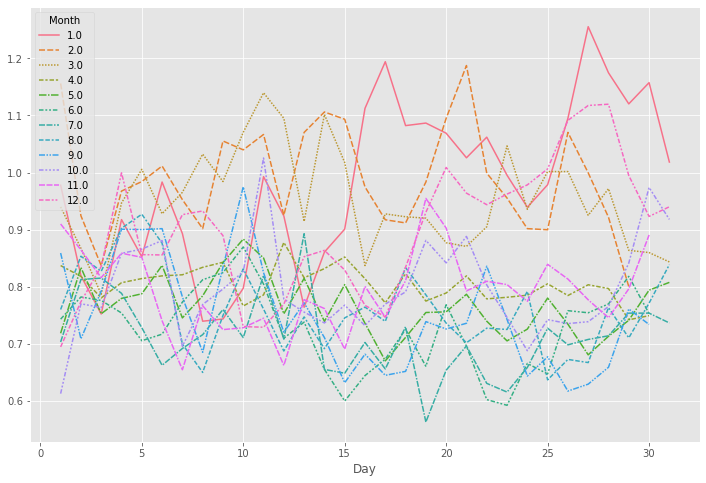

In [128]:
# plots a separate line for each month:
sns.lineplot(data=df_wide11, legend='auto')

### Multivariate Analysis
- it is comparing two or more features or variables and their visuals

In [129]:
# correlation of features
imputed_df.corr()

Year     Month       Day      MST        Hpa      Temp  \
Year          1.000000 -0.036475  0.010701 -0.000857  0.082098  0.071047   
Month        -0.036475  1.000000  0.019519 -0.000896 -0.046145 -0.070067   
Day           0.010701  0.019519  1.000000  0.001217  0.040386  0.018139   
MST          -0.000857 -0.000896  0.001217  1.000000 -0.113124  0.330249   
Hpa           0.082098 -0.046145  0.040386 -0.113124  1.000000 -0.373818   
Temp          0.071047 -0.070067  0.018139  0.330249 -0.373818  1.000000   
Dew_point    -0.042783  0.316387 -0.000180  0.107077 -0.267905  0.012667   
rel_humidity -0.073286  0.187238 -0.018676 -0.275933  0.221930 -0.921007   
wind_dir     -0.071439 -0.011071  0.002655  0.033200 -0.179625  0.049453   
wind_speed    0.071090 -0.101427  0.005969  0.164621 -0.086968  0.628231   
rain_dur     -0.067347 -0.062229  0.018216 -0.024132  0.014345 -0.248800   
rain_amt     -0.105994 -0.059701  0.096189  0.068873 -0.130485  0.104600   

              Dew_point  rel_humidity  wind_dir  wind_speed  rain_dur  \
Year          -0.042783     -0.073286 -0.071439    0.071090 -0.067347   
Month          0.316387      0.187238 -0.011071   -0.101427 -0.062229   
Day           -0.000180     -0.018676  0.002655    0.005969  0.018216   
MST            0.107077     -0.275933  0.033200    0.164621 -0.024132   
Hpa           -0.267905      0.221930 -0.179625   -0.086968  0.014345   
Temp           0.012667     -0.921007  0.049453    0.628231 -0.248800   
Dew_point      1.000000      0.359585  0.232574   -0.304674 -0.147061   
rel_humidity   0.359585      1.000000  0.055752   -0.712519  0.218854   
wind_dir       0.232574      0.055752  1.000000   -0.187190  0.022903   
wind_speed    -0.304674     -0.712519 -0.187190    1.000000 -0.193284   
rain_dur      -0.147061      0.218854  0.022903   -0.193284  1.000000   
rain_amt      -0.090344     -0.117725  0.051120    0.103826  0.500384   

              rain_amt  
Year         -0.105994  
Month        -0.059701  
Day           0.096189  
MST           0.068873  
Hpa          -0.130485  
Temp          0.104600  
Dew_point    -0.090344  
rel_humidity -0.117725  
wind_dir      0.051120  
wind_speed    0.103826  
rain_dur      0.500384  
rain_amt      1.000000

<AxesSubplot:>

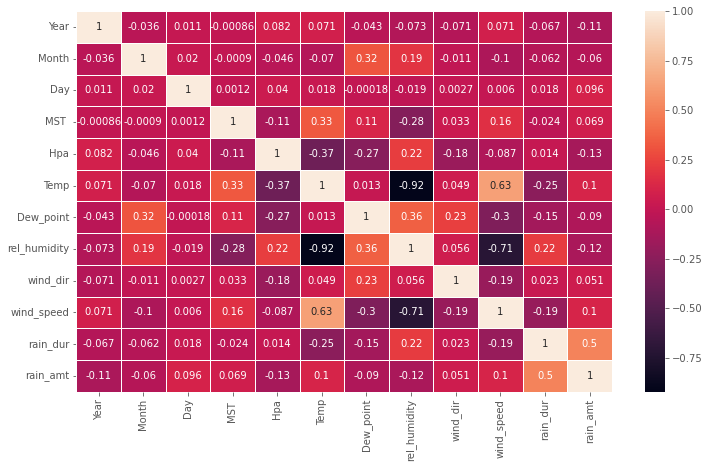

In [130]:
corel = imputed_df.corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

<AxesSubplot:>

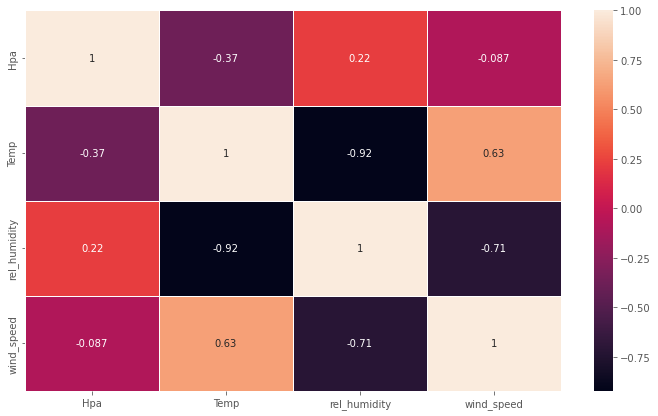

In [131]:
# Correlating the four parameters or features- Hpa, Temp, rel_humidity and wind_speed
corel = imputed_df[['Hpa', 'Temp', 'rel_humidity', 'wind_speed']].corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

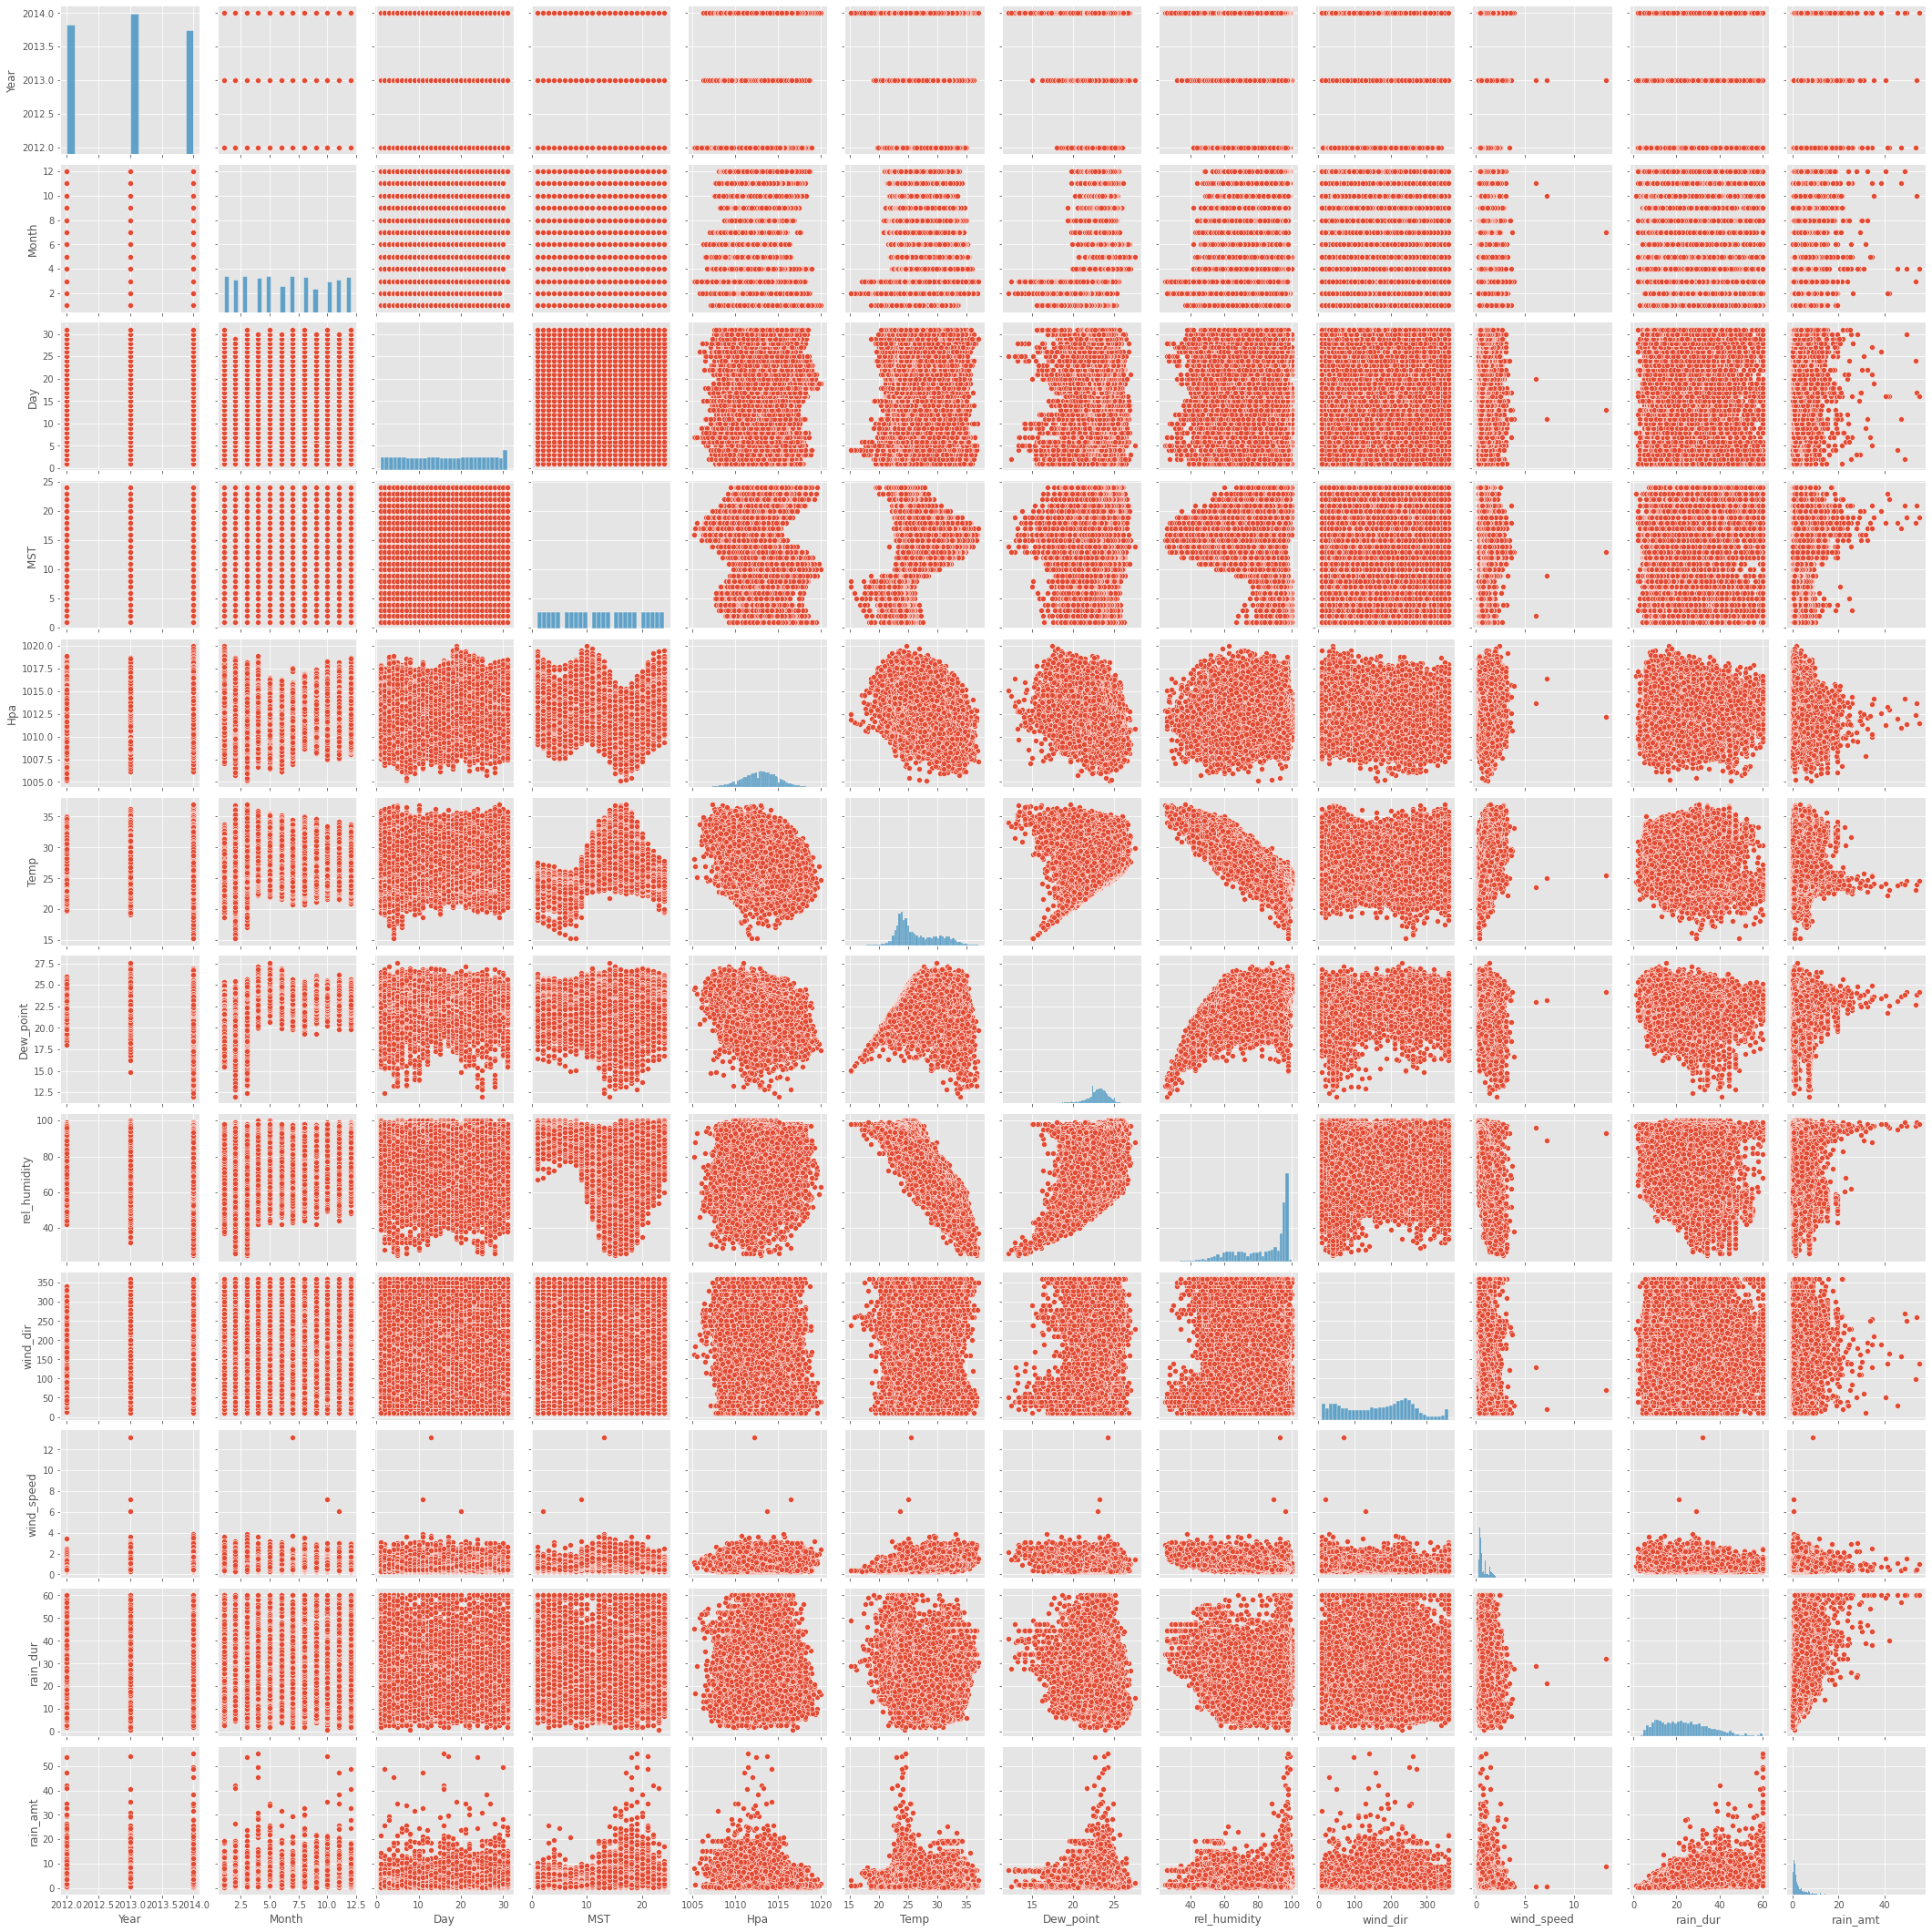

In [132]:
# pairplot of all the features
sns.pairplot(imputed_df)

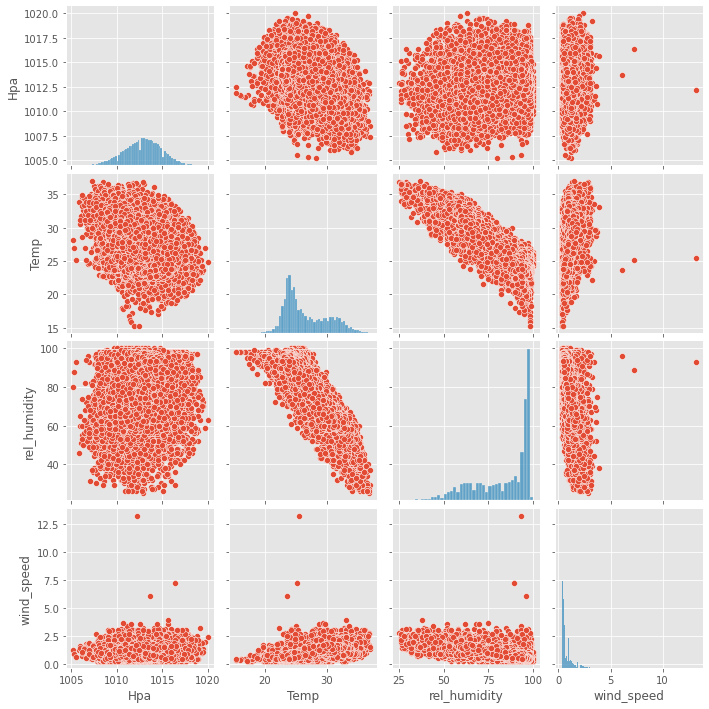

In [133]:
# pairplot of selected features:
sns.pairplot(imputed_df[['Hpa', 'Temp', 'rel_humidity', 'wind_speed']])

<Figure size 14400x8640 with 0 Axes>

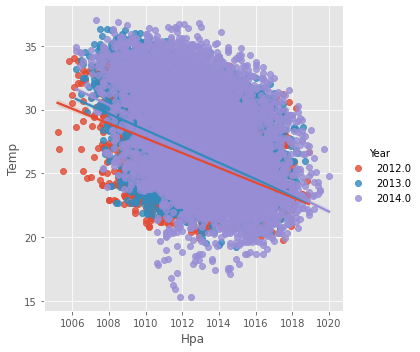

In [134]:
# visualizing Year and Temp apartment by Atmospheric Pressure
plt.figure(figsize = (200, 120))
sns.lmplot(x = 'Hpa', y = 'Temp', data = imputed_df, hue = 'Year')

## Data Preprocessing and Manipulation

In [135]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24579 non-null  float64
 1   Month         24579 non-null  float64
 2   Day           24579 non-null  float64
 3   MST           24579 non-null  float64
 4   Hpa           24579 non-null  float64
 5   Temp          24579 non-null  float64
 6   Dew_point     24579 non-null  float64
 7   rel_humidity  24579 non-null  float64
 8   wind_dir      24579 non-null  float64
 9   wind_speed    24579 non-null  float64
 10  rain_dur      24579 non-null  float64
 11  rain_amt      24579 non-null  float64
dtypes: float64(12)
memory usage: 2.3 MB


In [136]:
imputed_df.shape

(24579, 12)

In [137]:
imputed_df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012.0    1.0  1.0   1.0  1014.9  24.4       23.0          92.0     192.0   
1  2012.0    1.0  1.0   2.0  1014.5  24.3       23.0          93.0     168.0   
2  2012.0    1.0  1.0   3.0  1013.7  23.8       23.2          96.0     182.0   
3  2012.0    1.0  1.0   4.0  1012.9  23.6       23.1          97.0     138.0   
4  2012.0    1.0  1.0   5.0  1013.3  23.5       23.1          98.0     216.0   

   wind_speed  rain_dur  rain_amt  
0        0.54      39.6      2.32  
1        0.46      39.6      2.32  
2        0.42      57.0      1.80  
3        0.38      60.0      4.30  
4        0.42      60.0      9.80

In [138]:
imputed_df.isnull().sum()

Year            0
Month           0
Day             0
MST             0
Hpa             0
Temp            0
Dew_point       0
rel_humidity    0
wind_dir        0
wind_speed      0
rain_dur        0
rain_amt        0
dtype: int64

In [140]:
imputed_df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

## Predicting Missing values of the Dataset
it is a regression task. In this task we will be looking at the following Algorrithm:
- Decision Tree Regressor
- Random Forest Regressor
- Linear Regression
- K-Nearest Neighbor

### Select Target
- The target is what you want to predict. In this exercise we want to missing values in Hpa, Temp, Relative_humidity and Wind_speed.

In [251]:
# we usually tend to name the target y
y = imputed_df['Hpa']
y.head()

0    1014.9
1    1014.5
2    1013.7
3    1012.9
4    1013.3
Name: Hpa, dtype: float64

## Feature Selection
Normally you don't need to use all the columns in your dataframe to predict your target.

- Feature selection is where you choose the features that you will use to train your model.

We tend to call the training data X

In [253]:
# view columns names
imputed_df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [255]:
# create a list of features
'''for now they are just numerical columns, remember that Hpa is our target and should not be in your features'''

feature_columns = ['Temp', 'rel_humidity', 'wind_speed']

In [256]:
# create X by filtering the dataset with selected features
X = imputed_df[feature_columns]
X.head()

Temp  rel_humidity  wind_speed
0  24.4          92.0        0.54
1  24.3          93.0        0.46
2  23.8          96.0        0.42
3  23.6          97.0        0.38
4  23.5          98.0        0.42

### Decision Tree Regressor without splitting

In [257]:
# import the model from Scikit Learn

from sklearn.tree import DecisionTreeRegressor

In [274]:
# create an instance of the model
dr_model = DecisionTreeRegressor(random_state = 42)

In [275]:
# fit your model to your data, i.e train your model
dr_model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [276]:
# predict house prices
preds = dr_model.predict(X)

In [277]:
print('Actual missing values: ', y.head(10).tolist())
print('Predicted missing values: ', preds[:10])

Actual missing values:  [1014.9, 1014.5, 1013.7, 1012.9, 1013.3, 1013.4, 1014.1, 1015.1, 1015.7, 1016.0]
Predicted missing values:  [1011.95       1014.5        1012.825      1013.375      1012.96666667
 1014.         1013.21428571 1013.62       1015.7        1013.62      ]


### Observation
- It appears that our predictions are close to the actual prices. We can use performance statistical metrics to evaluate the model. One such metric is mean absolute error.

## Evaluate Model with Performance Metrics
- if the actual missing values of the dataset is 1014.9 but our model predicts 1011.95 the difference 2.95.

Statiscally, we can call that ERROR or RESIDUAL.

- Mean Absolute Error is the mean of all such errors in the range of the predicted values.

In [278]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, preds)
print(mae)

0.4299219677093713


In [279]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, preds)
print(mse)

0.7529626113414802


In [280]:
# R Squared : r2-score
from sklearn.metrics import r2_score
score = r2_score(y, preds)
print(score)

0.8191234113613709


### Observation
An R2 score of 0.82 means that the model is able to explain 82% of the variability in the independent variables. In other words, the model is able to capture 82% of the patterns in the data and the remaining 18% of the variance is still unexplained.

## Train, Test and Split of the Dataset
- it is when you split your data into a training set and a testing set based on a particular ratio. The ratio can either be 30:70 or 20:80. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set.

In [383]:
# import train test split
from sklearn.model_selection import train_test_split

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [385]:
# to confirm the shape of both the training set and test set
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17205, 3)
X_test:  (7374, 3)
y_train:  (17205,)
y_test:  (7374,)


In [386]:
# retrain our Decision tree model

dr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [387]:
# predict on the test set
preds2 = dr_model.predict(X_test)

In [388]:
# manually compare
print('Actual missing values: ', y.head().tolist())
print('Predicted missing values: ', preds2[:5])

Actual missing values:  [1014.9, 1014.5, 1013.7, 1012.9, 1013.3]
Predicted missing values:  [1013.68 1014.1  1011.6  1012.45 1014.1 ]


## Assumption based on Decision tree model

<AxesSubplot:xlabel='Hpa'>

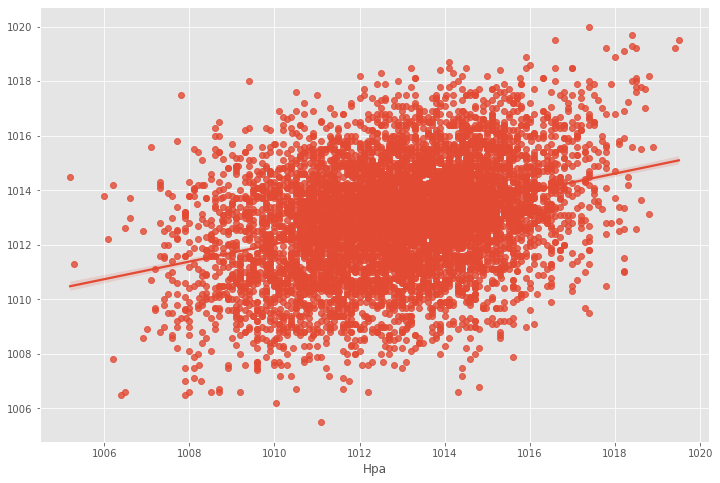

In [389]:
# plot a scatter plot for the prediction
sns.regplot(x = y_test, y = preds2)

It show that the model has predicted the missing values well for the Hpa variable

In [391]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y_test, preds2)
print('Without splitting', mae)
print('With splitting', mae2)

Without splitting 0.4299219677093713
With splitting 1.8271288356885973


In [392]:
# R Squared
from sklearn.metrics import r2_score
score2 = r2_score(y_test, preds2)
print('Without splitting', score)
print('With splitting', score2)

Without splitting 0.8191234113613709
With splitting -0.27111560123548784


#### Adjusted R square
#### Adjusted R^2 = 1 - [(1 - R^2)(n - 1) / (n - k - 1)]

Where:

R^2 = Coefficient of determination of the model

n = The number of observations 

k = The number of predictors variables

In [395]:
# display adjusted R-squared
1 - (1 - score2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


-0.2716330159985416

### Observation
An R2 score of -0.27 is unsual and indicates that the model is a poor fit for the observed data. it means that the model explains less variance in the data than a horizontal line(with a R2 score of 0) and even worse than a constant model that always predicts the mean value of the target variable(with a R2 score of 0). 

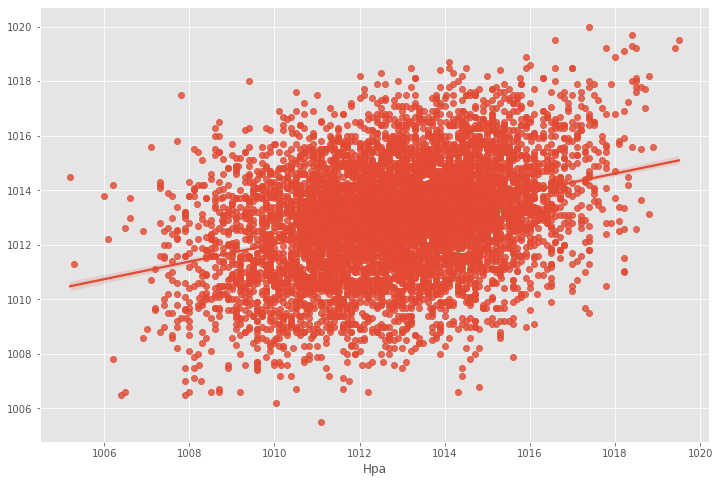

Pearsons correlation: 0.337


In [394]:
# Correlating the y_test and preds2 for Decision tree model
from scipy.stats import pearsonr

# plot a scatter plot for the correlation
sns.regplot(x = y_test, y = preds2)
plt.show()

corr, _ = pearsonr(y_test, preds2)
print('Pearsons correlation: %.3f' % corr)

## Random Forest Regressor

In [304]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [306]:
# fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [307]:
# predict on the test data
preds_rf = rf_model.predict(X_test) 

In [308]:
# manually compare
print('Actual missing values: ', y_test.head().tolist())
print('Predicted missing values: ', preds_rf[:5])

Actual missing values:  [1014.8, 1016.8, 1012.9, 1013.3399999999999, 1012.0]
Actual missing values:  [1013.18979594 1013.89761429 1012.12147857 1012.53042857 1013.32023651]


In [313]:
u_hpa = pd.DataFrame(preds_rf)
u_hpa.tail()

0
7369  1012.959014
7370  1011.050167
7371  1013.980430
7372  1015.309000
7373  1011.715767

In [314]:
u_hpa.isnull().sum()

0    0
dtype: int64

In [316]:
# calculate the error

mae_rf = mean_absolute_error(y_test, preds_rf)

print('Decision tree with train test split ', mae2)
print('Random forest with train test split', mae_rf)

Decision tree with train test split  0.4299219677093713
Random forest with train test split 1.4885670341563162


### Observation
The random forest model has a MAE of 1.489, which means that on the average, the predicted missing values are off by 1.489 compared to the actual missing values. The lower the MAE, the  better the model's predictive accuracy. Decision tree regressor performed better in terms of predictive accuracy.

In [317]:
# R Squared for both Decision Tree and Random Forest
score_rf = r2_score(y_test, preds_rf)
print('Random Forest with train test split', score_rf)
print('Decision Tree with train test spit', score2)

Random Forest with train test split 0.1708603707952383
Decision Tree with train test spit -0.27111560123548784


In [320]:
# display adjusted R-squared for Random forest
1 - (1 - score_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


0.17052286484033807

### Observation 
The r2-score of 0.171 means that approximately 17.1% of the variation in the variables can be explained by the indepeendent variables in the model. This implies that the model has a relatively weak predictive power, and a large portion of the variabilty in the dependent variable(target) is not accounted for by the independednt variables(features)

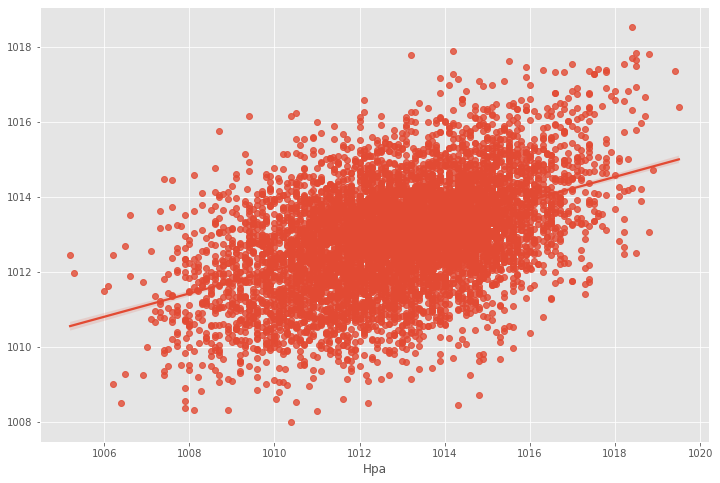

Pearsons correlation: 0.464


In [379]:
# Correlating the y_test and preds-KNN
from scipy.stats import pearsonr

# plot a scatter plot for the correlation
sns.regplot(x = y_test, y = preds_rf)
plt.show()

corr, _ = pearsonr(y_test, preds_rf)
print('Pearsons correlation: %.3f' % corr)

### Standardizing the  dataset

In [321]:
# Standardizing a dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [322]:
X_train = scaler.fit_transform(X_train)

In [323]:
X_test = scaler.transform(X_test)

In [325]:
X_train

array([[-1.80750258,  0.8256491 , -1.10097023],
       [ 2.18835006, -1.68182069, -0.06854286],
       [ 1.1966786 , -1.11763998,  0.55091357],
       ...,
       [ 0.0300063 , -0.61614603, -0.39891962],
       [ 0.11750672, -0.3027123 ,  0.55091357],
       [-0.66999709,  0.95102259, -0.89448476]])

In [326]:
X_test

array([[-0.84499793,  0.8256491 , -0.564108  ],
       [ 1.1966786 , -0.99226649, -0.06854286],
       [-0.23249497,  0.44952863, -0.48151381],
       ...,
       [-0.87416474,  0.88833584, -0.81189057],
       [-0.64083028,  0.44952863, -0.39891962],
       [ 0.93417733, -0.67883277,  0.75739904]])

### Linear Regression

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
LR = LinearRegression()

In [329]:
LR.fit(X_train, y_train)

LinearRegression()

In [330]:
# print the coefficients and intercept
print(LR.coef_)

[-2.24751877 -1.5033786   0.17448202]


In [331]:
print(LR.intercept_)

1012.9119372275501


In [333]:
# prediction with test data
preds_LR = LR.predict(X_test)
preds_LR

array([1013.47139605, 1011.70217233, 1012.67464682, ..., 1013.39947349,
       1013.60679928, 1011.96505131])

In [335]:
# manually compare actual and predicted missing values
print('Actual missing values: ', y_test.head().tolist())
print('Predicted missing values: ', preds_LR[:5])

Actual missing values:  [1014.8, 1016.8, 1012.9, 1013.3399999999999, 1012.0]
Predicted missing values:  [1013.47139605 1011.70217233 1012.67464682 1013.3409927  1013.61071073]


### Assumptions for Linear regression model

<AxesSubplot:xlabel='Hpa'>

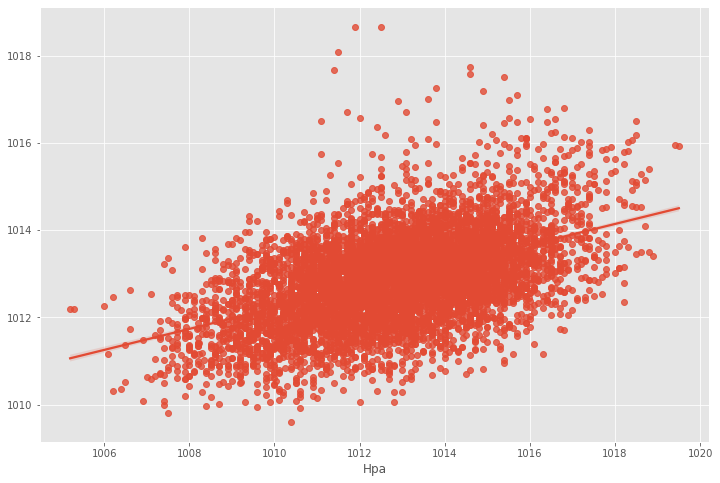

In [350]:
# plot a scatter plot for the prediction
sns.regplot(x = y_test, y = preds_LR)

In [341]:
# residuals basically means errors based on the y_predicted values
residuals = y_test - preds_LR
residuals

2350     1.328604
23254    5.097828
20070    0.225353
22168   -0.000993
21899   -1.610711
           ...   
22849   -0.882595
10154   -1.147468
15730   -1.699473
2046     1.493201
14015   -1.465051
Name: Hpa, Length: 7374, dtype: float64

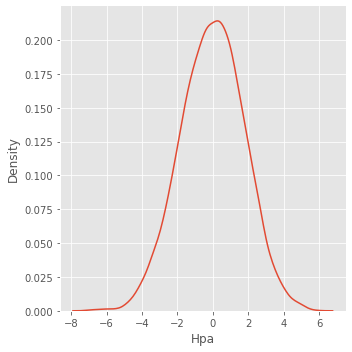

In [342]:
# plot residuals to get a normal distribution
sns.displot(residuals, kind = 'kde')

<AxesSubplot:ylabel='Hpa'>

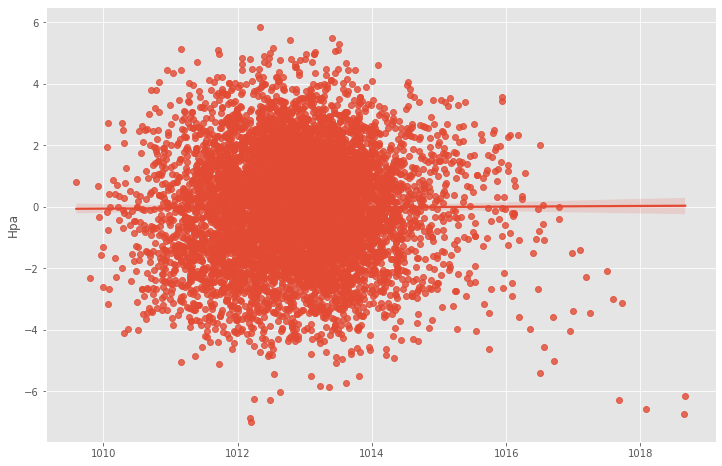

In [347]:
# scatter plot with respect to prediction and residuals
# scattered uniform distribution
sns.regplot(x = preds_LR, y = residuals)

In [336]:
# performance metrics - mse, mae, rmse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, preds_LR))
print(mean_absolute_error(y_test, preds_LR))
print(np.sqrt(mean_squared_error(y_test, preds_LR)))

3.2098650182251895
1.437537364739067
1.7916096165809083


In [337]:
# R Squared for Linear Regression
score_LR = r2_score(y_test, preds_LR)
print(score_LR)

0.2431289854478036


In [338]:
# display adjusted R-squared for Linear Regression
1 - (1 - score_LR) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


0.24282089683943775

### Observation
- Having done the r2-score and adjusted r2-score, it means that the model only explains approximately 24.3% of the variability observed in the actual missing value of the dependent variable(Hpa).

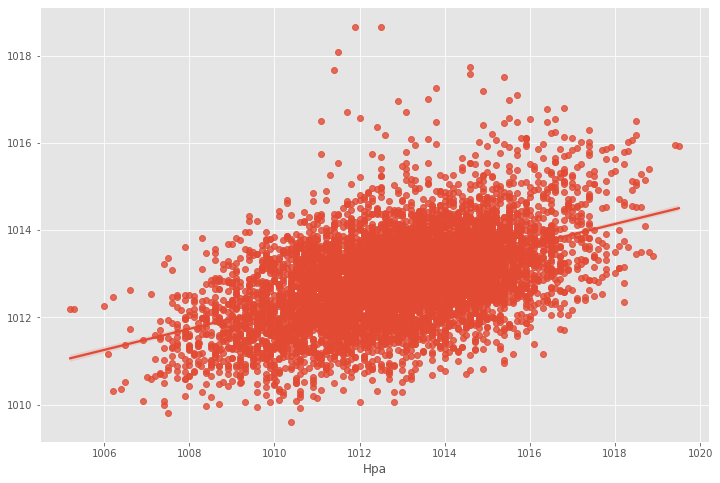

Pearsons correlation: 0.493


In [378]:
# Correlating the y_test and preds-KNN
from scipy.stats import pearsonr

# plot a scatter plot for the correlation
sns.regplot(x = y_test, y = preds_LR)
plt.show()

corr, _ = pearsonr(y_test, preds_LR)
print('Pearsons correlation: %.3f' % corr)

### K-Nearest Neighbour Regressor Model

In [360]:
# import the KNeighbor classifier
from sklearn.neighbors import KNeighborsRegressor

In [361]:
# Create the model
knn_model = KNeighborsRegressor(n_neighbors=5)

In [362]:
# Fit the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [364]:
# Predict on the test data
preds_knn = knn_model.predict(X_test)

In [365]:
# manually compare
print('Actual missing values: ', y_test.head().tolist())
print('Predicted missing values: ', preds_knn[:5])

Actual missing values:  [1014.8, 1016.8, 1012.9, 1013.3399999999999, 1012.0]
Predicted missing values:  [1012.576 1013.12  1012.564 1011.64  1014.08 ]


In [366]:
# KNN performance metrics - mse, mae, rmse

print(mean_squared_error(y_test, preds_knn))
print(mean_absolute_error(y_test, preds_knn))
print(np.sqrt(mean_squared_error(y_test, preds_knn)))

3.5079492834282644
1.489994033089233
1.872952023792458


In [367]:
# R Squared for KNN Regression
score_knn = r2_score(y_test, preds_knn)
print(score_knn)

0.17284212324478077


In [368]:
# display adjusted R-squared for KNN Regression
1 - (1 - score_knn) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


0.1725054239733742

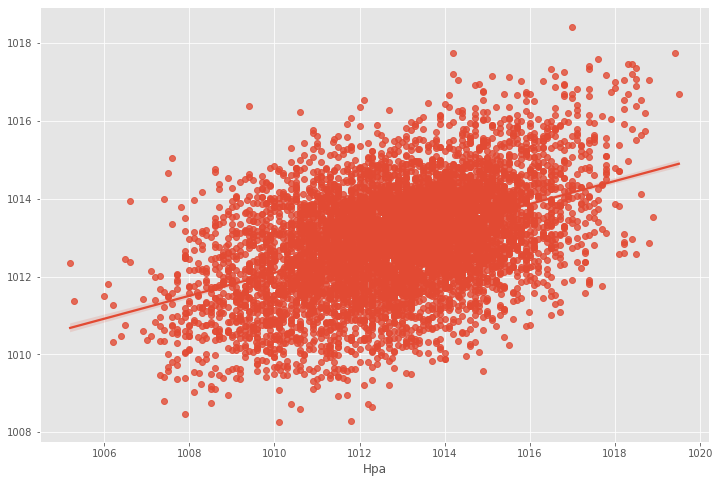

Pearsons correlation: 0.457


In [375]:
# Correlating the y_test and preds-KNN
from scipy.stats import pearsonr


# plot a scatter plot for the correlation
sns.regplot(x = y_test, y = preds_knn)
plt.show()


corr, _ = pearsonr(y_test, preds_knn)
print('Pearsons correlation: %.3f' % corr)